# Reusing the code from Exploration Phase. The code and comments will be updated as proceeded. The code and comments might not be perfect until finalized


In [1]:
# Old-comment: PCA section, Correlation, Heatmaps, and then Bivariate plots can be seen to be important
# Might have to adjust/improve my conclusions from the plots in future work

In [2]:
# Target variable ACR i.e. Albumin Creatinine Ratio

# Tried the following Target variables that might not even be present now. Thopugh might include if seem to be important

# ESRD patients: Avg. Annual Mortality rates is given the most importance
# One another target variable is: ESRD patients: Total (or %) deaths for target year
# Other target variables: Dialysis patients: Total (or %) deaths for target year

In [3]:
# For plotting, import libraries
from matplotlib import pyplot as plt
import matplotlib

# import seaborn as sns
%matplotlib inline
import pandas as pd


import numpy as np

from subprocess import check_output

from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)


In [5]:
import os

data_folder = './acr-data-for-analysis/food-groups/'
data_folder = './data-for-code/'
data_files = os.listdir(data_folder)
data_files

['average_intake_by_food_subgroups_demo_acr_kidney_blood_pressure.xlsx',
 'food-subgroups-subgroup-names-on-columns.csv',
 'more-col-recom-amt-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx',
 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx',
 'regression_variables_after_pca_saved_for_factor_transformations.csv',
 'regression_variables_after_pca_saved_for_factor_transformations_food_subgroup.csv',
 'transformed_regression_variables_after_pca_saved_for_factor_transformations.csv']

In [6]:
data_file = data_folder + 'more-col-recom-amt-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx'
excel_file = pd.ExcelFile(data_file)

In [7]:
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names[:4]

foodgroup_acr_data_df = excel_file.parse('Sheet1')
foodgroup_acr_data_df.head(20)

,participant_id,participant_age,gender,food_group_name,avg_food_weight_in_gms,age_from_recom_amount,food_group_from_recom_amount,avg_taken_from_recom_amount,recommended_low,recommended_high,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,m_food_group_name,a_sample_food_code,a_sample_food,a_sample_food_name,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
0,85287,69,1,Vegetables,160.08,69,Vegetables,277.5,337.5,487.5,2254.05,1.0,204.0,90.0,177.0,13.300,706.0,27.95,12.79,2.7,6.080,1.288,1.7080,2.527,5.0,154.0,245.0,72.0,553.0,0.0,Vegetables,78101110,"Potato, mashed, from fast food, with gravy","POTATO, MASHED, FROM FAST FOOD",1,4170.0,4170.0,16354.0,185.0,2.0,2.0,NaN,4.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN
1,86548,69,1,Fruits,83.38,69,fruits,180.0,262.5,337.5,24.20,2.0,132.0,74.0,90.0,1.100,1.0,23.07,15.48,3.6,0.330,0.113,0.0320,0.076,0.0,26.0,23.0,27.0,362.0,0.0,Fruits,63107010,"Orange, raw","ORANGE, RAW",7,27.1,27.1,9900.8,112.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN
2,93587,29,1,Fruits,155.00,29,fruits,135.0,262.5,337.5,28.32,2.0,124.0,68.0,79.0,0.170,8.0,20.34,19.30,0.5,0.090,0.022,0.0340,0.017,0.0,26.0,3.0,5.0,37.0,0.0,Fruits,64204010,Mango nectar,MANGO NECTAR,7,30.3,30.3,9458.8,107.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
3,86993,15,2,"Fats, oils, and salad dressings",3.15,15,"Fats, oils, and salad dressings",21.0,25.5,40.5,15.20,NaN,110.0,56.0,23.0,0.020,18.0,0.09,0.00,0.0,2.460,1.428,0.6250,0.105,7.0,1.0,1.0,0.0,1.0,0.0,"Fats, oils, and salad dressings",81101010,"Butter, whipped, tub, salted","BUTTER, WHIPPED, TUB, SALTED",17,15.5,15.5,9016.8,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84865,26,1,Vegetables,328.38,26,Vegetables,232.5,412.5,525.0,3.60,2.0,118.0,58.0,199.0,4.850,134.0,40.34,24.40,3.6,9.390,1.489,3.8050,3.441,0.0,48.0,87.0,45.0,689.0,0.0,Vegetables,74602200,"Tomato soup, canned, reduced sodium, prepared ...","TOMATO SOUP, CANNED, REDUCED S",1,6.3,6.3,15470.0,175.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
5,91745,5,2,Dairy,237.50,5,dairy,322.5,375.0,450.0,23.48,NaN,NaN,NaN,268.0,17.010,327.0,38.09,36.16,0.1,5.160,3.055,1.4380,0.268,25.0,605.0,486.0,64.0,833.0,0.0,Dairy,11511550,"Yogurt, low fat milk, fruit","YOGURT, LOW FAT MILK, FRUIT",11,5.4,5.4,2033.2,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83810,6,2,Vegetables,28.00,6,Vegetables,120.0,225.0,375.0,6.75,NaN,NaN,NaN,136.0,1.820,153.0,15.66,1.53,1.1,8.700,1.121,3.7020,3.418,0.0,9.0,41.0,16.0,332.0,0.0,Vegetables,71200130,"Potato chips, cheese flavored","POTATO CHIPS, CHEESE FLAVORED",1,13.1,13.1,17149.6,194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,89585,74,2,Dairy,71.77,74,dairy,217.5,435.0,465.0,7.39,2.0,136.0,70.0,231.0,6.020,115.0,37.43,27.68,0.1,6.900,3.610,1.7130,0.422,21.0,183.0,158.0,18.0,274.0,0.0,Dairy,13130620,"Light ice cream, soft serve cone, flavors othe...","LIGHT ICE CREAM, SOFT SERVE CO",11,3.4,3.4,4066.4,46.0,NaN,2.0,NaN,5.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,3.0,NaN
8,84838,23,1,"Sugars, sweets, and beverages",148.79,23,"Sugars, sweets, and beverages",78.0,54.0,66.0,11.18,2.0,106.0,64.0,88.0,1.110,43.0,15.32,13.08,0.2,2.740,1.294,0.5960,0.629,2.0,31.0,28.0,6.0,63.5,0.0,"Sugars, sweets, and beverages",94000100,"Water, tap","WATER, TAP",16,15.2,15.2,12022.4,136.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
9,85361,43,2,Dairy,121.88,43,dairy,240.0,435.0,465.0,15.50,2.0,136.0,88.0,96.

In [8]:
foodgroup_acr_data_df.describe()

,participant_id,participant_age,gender,avg_food_weight_in_gms,age_from_recom_amount,avg_taken_from_recom_amount,recommended_low,recommended_high,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
count,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,44055.000000,29742.000000,38853.000000,38853.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,45419.000000,4.541900e+04,45419.000000,44055.000000,44055.000000,44055.000000,44055.000000,1274.000000,29742.000000,3252.000000,28217.000000,9098.000000,28217.000000,6668.000000,28217.000000,6948.000000,28217.000000,2808.000000,10967.000000,28217.000000,0.0
mean,88752.681411,36.587287,1.518550,161.791645,36.587287,399.481693,418.068617,553.304608,44.440649,1.965873,120.803284,66.158289,270.619365,11.334877,477.117143,32.032490,15.403211,2.435520,12.207437,4.237338,4.361333,2.942117,49.208471,140.093822,186.893375,37.602052,354.401355,1.051328,5.763499e+07,9.919923,44.326067,44.326067,10515.631674,118.955110,1.959184,1.906193,1.869619,1.738420,1.408661,1.774356,1.963407,1.761208,1.923287,1.909416,2.384972,1.512629,1.294929,NaN
std,2869.348825,23.796881,0.499661,212.006694,23.796881,363.536249,311.211597,423.758031,363.051667,0.320361,18.664920,14.145235,271.216517,16.493533,646.142403,33.226583,20.465090,3.500755,15.300007,5.970220,5.901821,4.405742,104.791004,198.390236,222.119759,41.338728,345.030697,8.227787,2.737373e+07,5.010935,292.965326,292.965326,7077.604885,80.063403,0.550567,0.457474,0.465585,1.249075,0.761313,0.509977,1.041444,0.491241,1.005821,0.392212,1.189379,0.888042,1.206488,NaN
min,83732.000000,3.000000,1.000000,0.200000,3.000000,10.500000,15.000000,16.500000,0.220000,1.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.110000e+07,1.000000,0.210000,0.210000,312.900000,3.540000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,86263.000000,14.000000,1.000000,58.750000,14.000000,105.000000,150.000000,225.000000,5.210000,2.000000,108.000000,58.000000,95.000000,0.800000,41.000000,8.270000,2.260000,0.000000,0.930000,0.142000,0.134000,0.120000,0.000000,18.000000,27.000000,11.500000,112.000000,0.000000,3.110301e+07,7.000000,4.600000,4.600000,5127.200000,58.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,NaN
50%,88783.000000,34.000000,2.000000,110.880000,34.000000,240.000000,412.500000,465.000000,8.220000,2.000000,118.000000,66.000000,187.000000,4.960000,236.000000,25.110000,9.020000,1.200000,7.180000,2.200000,2.266000,1.136500,7.000000,60.000000,118.000000,27.000000,275.000000,0.000000,6.310100e+07,11.000000,8.800000,8.800000,9193.600000,104.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,NaN
75%,91223.000000,57.000000,2.000000,191.625000,57.000000,817.500000,787.500000,975.000000,15.950000,2.000000,130.000000,74.000000,367.000000,14.905000,671.000000,44.980000,21.000000,3.500000,17.700000,5.762500,6.257750,4.112000,49.000000,192.00

In [9]:
foodgroup_acr_data_df.columns

Index(['participant_id', 'participant_age', 'gender', 'food_group_name',
       'avg_food_weight_in_gms', 'age_from_recom_amount',
       'food_group_from_recom_amount', 'avg_taken_from_recom_amount',
       'recommended_low', 'recommended_high', 'acr', 'kidney_failed',
       'systolic_pressure', 'diastolic_pressure', 'calorie', 'protein',
       'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat',
       'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous',
       'magnesium', 'potassium', 'alcohol', 'm_food_group_name',
       'a_sample_food_code', 'a_sample_food', 'a_sample_food_name',
       'food_group_id', 'albumin_urine_mu_g', 'albumin_urine_mg',
       'creatinine_mu_mol', 'creatinine_mg', 'received_dialysis_in_12_months',
       'kidney_stones', 'passed_kidney_stones_12_months',
       'urinary_leakage_frequency', 'urine_lose_each_time',
       'leak_during_activities', 'how_frequent_leak_occurs',
       'urinated_before_reaching_toilet', 'how_freque

# PCA: Apply PCA to find important features

# from the dataset above: move food group name from rows to columns

Pivoting

Only food group intake data

In [10]:
data_folder = './data-for-code/' #'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/food-groups/'

# was here 'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' 
#/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
# C:\Users\Sayed Ahmed\mrp_project_implementation\phase methodology and experiments\excel-xlstat-analysis\food-groups

os.listdir(data_folder)

df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

#df_food_group_only.T

df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

df_food_group_only_index_unstack = df_food_group_only_index.unstack()

df_food_group_only_index_unstack.head()

avg_food_weight_in_gms                                  \
food_group_name                  Dairy Fats, oils, and salad dressings   
participant_id                                                           
83732                           245.47                           21.31   
83733                              NaN                           14.19   
83734                           266.92                           16.89   
83735                            15.50                             NaN   
83736                              NaN                           28.38   

                                                                       \
food_group_name  Fruits  Grains Protein Sugars, sweets, and beverages   
participant_id                                                          
83732            197.00  102.15  154.58                        357.50   
83733               NaN  201.73  272.00                        889.16   
83734            350.33   79.50  117.60                        430.50   
83735               NaN   55.15  242.00                        160.33   
83736             84.83  158.00   64.50                        237.56   

                            
food_group_name Vegetables  
participant_id              
83732                68.38  
83733                94.84  
83734               126.27  
83735                89.30  
83736                 6.00

# All other columns by each participant
#mean does not have effect because all rows are the same for a participant for these columns

In [11]:
#foodgroup_acr_data_df.columns
# columns such as avg_taken_from_recom_amount	recommended_low	recommended_high also need pivoting otherwise the averaged value does not make sense
# not doing analysis on them for noe

df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'food_group_id', 'avg_food_weight_in_gms', 'avg_taken_from_recom_amount', 'recommended_low', 'recommended_high'], axis=1)
df_without_food_groups.head()

df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()
df_without_food_groups_one_entry.head()

,participant_age,gender,age_from_recom_amount,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,62.0,1.0,62.0,6.10,2.0,128.0,70.0,293.142857,12.738571,586.571429,33.197143,15.197143,3.042857,15.041429,5.569214,5.508571,2.997571,75.857143,170.285714,192.571429,36.857143,443.571429,0.00,5.910781e+07,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83733,53.0,1.0,53.0,12.82,2.0,146.0,88.0,775.300000,21.409000,843.300000,74.188000,35.189000,1.720000,29.830000,8.580300,9.324900,7.989300,143.800000,111.000000,418.800000,64.900000,599.200000,18.97,6.592856e+07,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83734,78.0,1.0,78.0,150.00,1.0,138.0,46.0,338.142857,14.153571,522.333333,44.706429,16.815714,5.328571,12.953571,5.459071,4.216571,3.764357,70.000000,183.523810,205.000000,66.571429,597.000000,0.00,5.919755e+07,105.0,105.0,6188.0,70.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
83735,56.0,2.0,56.0,5.69,2.0,132.0,72.0,215.400000,13.308000,423.600000,23.758000,7.176000,2.560000,8.626000,3.057600,3.341600,1.587200,27.400000,243.800000,258.000000,52.800000,395.200000,0.00,5.269247e+07,5.8,5.8,9016.8,102.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN
83736,42.0,2.0,42.0,15.11,2.0,100.0,70.0,149.166667,3.920000,254.000000,17.648333,8.091667,0.550000,7.255000,3.211167,2.429667,0.805667,26.166667,19.166667,53.916667,9.333333,99.250000,0.00,6.522404e+07,47.6,47.6,27846.0,315.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN


In [12]:
merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape
merged.head()
#merged.to_csv(folder + 'food_group_data_ready_for_excel_regression.csv')

,"(avg_food_weight_in_gms, Dairy)","(avg_food_weight_in_gms, Fats, oils, and salad dressings)","(avg_food_weight_in_gms, Fruits)","(avg_food_weight_in_gms, Grains)","(avg_food_weight_in_gms, Protein)","(avg_food_weight_in_gms, Sugars, sweets, and beverages)","(avg_food_weight_in_gms, Vegetables)",participant_age,gender,age_from_recom_amount,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,245.47,21.31,197.00,102.15,154.58,357.50,68.38,62.0,1.0,62.0,6.10,2.0,128.0,70.0,293.142857,12.738571,586.571429,33.197143,15.197143,3.042857,15.041429,5.569214,5.508571,2.997571,75.857143,170.285714,192.571429,36.857143,443.571429,0.00,5.910781e+07,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83733,NaN,14.19,NaN,201.73,272.00,889.16,94.84,53.0,1.0,53.0,12.82,2.0,146.0,88.0,775.300000,21.409000,843.300000,74.188000,35.189000,1.720000,29.830000,8.580300,9.324900,7.989300,143.800000,111.000000,418.800000,64.900000,599.200000,18.97,6.592856e+07,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83734,266.92,16.89,350.33,79.50,117.60,430.50,126.27,78.0,1.0,78.0,150.00,1.0,138.0,46.0,338.142857,14.153571,522.333333,44.706429,16.815714,5.328571,12.953571,5.459071,4.216571,3.764357,70.000000,183.523810,205.000000,66.571429,597.000000,0.00,5.919755e+07,105.0,105.0,6188.0,70.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
83735,15.50,NaN,NaN,55.15,242.00,160.33,89.30,56.0,2.0,56.0,5.69,2.0,132.0,72.0,215.400000,13.308000,423.600000,23.758000,7.176000,2.560000,8.626000,3.057600,3.341600,1.587200,27.400000,243.800000,258.000000,52.800000,395.200000,0.00,5.269247e+07,5.8,5.8,9016.8,102.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN
83736,NaN,28.38,84.83,158.00,64.50,237.56,6.00,42.0,2.0,42.0,15.11,2.0,100.0,70.0,149.166667,3.920000,254.000000,17.648333,8.091667,0.550000,7.255000,3.211167,2.429667,0.805667,26.166667,19.166667,53.916667,9.333333,99.250000,0.00,6.522404e+07,47.6,47.6,27846.0,315.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN


In [13]:
# adjust column names

column_dict = {}
for aName in merged.columns:    
    try:        
        if 'avg_food_weight_in_gms' in aName:            
            column_dict[aName] = aName[1] 
        else:
            column_dict[aName] = aName
        
    except:
        print(aName)
        continue

# column_dict

In [14]:
merged = merged.rename(index=str, columns=column_dict)
merged.head()

,Dairy,"Fats, oils, and salad dressings",Fruits,Grains,Protein,"Sugars, sweets, and beverages",Vegetables,participant_age,gender,age_from_recom_amount,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,245.47,21.31,197.00,102.15,154.58,357.50,68.38,62.0,1.0,62.0,6.10,2.0,128.0,70.0,293.142857,12.738571,586.571429,33.197143,15.197143,3.042857,15.041429,5.569214,5.508571,2.997571,75.857143,170.285714,192.571429,36.857143,443.571429,0.00,5.910781e+07,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83733,NaN,14.19,NaN,201.73,272.00,889.16,94.84,53.0,1.0,53.0,12.82,2.0,146.0,88.0,775.300000,21.409000,843.300000,74.188000,35.189000,1.720000,29.830000,8.580300,9.324900,7.989300,143.800000,111.000000,418.800000,64.900000,599.200000,18.97,6.592856e+07,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83734,266.92,16.89,350.33,79.50,117.60,430.50,126.27,78.0,1.0,78.0,150.00,1.0,138.0,46.0,338.142857,14.153571,522.333333,44.706429,16.815714,5.328571,12.953571,5.459071,4.216571,3.764357,70.000000,183.523810,205.000000,66.571429,597.000000,0.00,5.919755e+07,105.0,105.0,6188.0,70.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
83735,15.50,NaN,NaN,55.15,242.00,160.33,89.30,56.0,2.0,56.0,5.69,2.0,132.0,72.0,215.400000,13.308000,423.600000,23.758000,7.176000,2.560000,8.626000,3.057600,3.341600,1.587200,27.400000,243.800000,258.000000,52.800000,395.200000,0.00,5.269247e+07,5.8,5.8,9016.8,102.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN
83736,NaN,28.38,84.83,158.00,64.50,237.56,6.00,42.0,2.0,42.0,15.11,2.0,100.0,70.0,149.166667,3.920000,254.000000,17.648333,8.091667,0.550000,7.255000,3.211167,2.429667,0.805667,26.166667,19.166667,53.916667,9.333333,99.250000,0.00,6.522404e+07,47.6,47.6,27846.0,315.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN


In [15]:
merged.columns

Index(['Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'participant_age', 'gender', 'age_from_recom_amount', 'acr',
       'kidney_failed', 'systolic_pressure', 'diastolic_pressure', 'calorie',
       'protein', 'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat',
       'saturated_fat', 'mono_fat', 'poly_fat', 'cholesterol', 'calcium',
       'phosphorous', 'magnesium', 'potassium', 'alcohol',
       'a_sample_food_code', 'albumin_urine_mu_g', 'albumin_urine_mg',
       'creatinine_mu_mol', 'creatinine_mg', 'received_dialysis_in_12_months',
       'kidney_stones', 'passed_kidney_stones_12_months',
       'urinary_leakage_frequency', 'urine_lose_each_time',
       'leak_during_activities', 'how_frequent_leak_occurs',
       'urinated_before_reaching_toilet', 'how_frequent',
       'leak_during_nonphysical_activities', 'how_frequest_leak_nonphysical',
       'how_much_leak_bothering', 'how_much_daily_a

In [16]:
# removing text features and/or not that important features
#foodgroup_acr_data_df

# replacing null values with zeros
# ideally mean value for each age group and food groupp for that colum will work better
df_drop_pca = merged #.drop([ 'food_group_from_recom_amount', 'm_food_group_name', 'a_sample_food', 'a_sample_food_name'], axis=1)
# 'participant_age', 'gender',
df_drop_pca.fillna(0, inplace=True)
df_drop_pca.head(10)

,Dairy,"Fats, oils, and salad dressings",Fruits,Grains,Protein,"Sugars, sweets, and beverages",Vegetables,participant_age,gender,age_from_recom_amount,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,245.47,21.31,197.00,102.15,154.58,357.50,68.38,62.0,1.0,62.0,6.10,2.0,128.0,70.0,293.142857,12.738571,586.571429,33.197143,15.197143,3.042857,15.041429,5.569214,5.508571,2.997571,75.857143,170.285714,192.571429,36.857143,443.571429,0.00,5.910781e+07,2.5,2.5,3624.4,41.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
83733,0.00,14.19,0.00,201.73,272.00,889.16,94.84,53.0,1.0,53.0,12.82,2.0,146.0,88.0,775.300000,21.409000,843.300000,74.188000,35.189000,1.720000,29.830000,8.580300,9.324900,7.989300,143.800000,111.000000,418.800000,64.900000,599.200000,18.97,6.592856e+07,23.2,23.2,16000.4,181.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
83734,266.92,16.89,350.33,79.50,117.60,430.50,126.27,78.0,1.0,78.0,150.00,1.0,138.0,46.0,338.142857,14.153571,522.333333,44.706429,16.815714,5.328571,12.953571,5.459071,4.216571,3.764357,70.000000,183.523810,205.000000,66.571429,597.000000,0.00,5.919755e+07,105.0,105.0,6188.0,70.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0
83735,15.50,0.00,0.00,55.15,242.00,160.33,89.30,56.0,2.0,56.0,5.69,2.0,132.0,72.0,215.400000,13.308000,423.600000,23.758000,7.176000,2.560000,8.626000,3.057600,3.341600,1.587200,27.400000,243.800000,258.000000,52.800000,395.200000,0.00,5.269247e+07,5.8,5.8,9016.8,102.0,0.0,2.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0
83736,0.00,28.38,84.83,158.00,64.50,237.56,6.00,42.0,2.0,42.0,15.11,2.0,100.0,70.0,149.166667,3.920000,254.000000,17.648333,8.091667,0.550000,7.255000,3.211167,2.429667,0.805667,26.166667,19.166667,53.916667,9.333333,99.250000,0.00,6.522404e+07,47.6,47.6,27846.0,315.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0
83737,132.50,5.21,76.00,74.67,116.33,221.62,197.50,72.0,2.0,72.0,16.25,2.0,116.0,58.0,129.000000,9.885714,445.809524,14.721429,4.612857,1.900000,5.081429,1.499714,1.939143,1.219714,31.428571,107.142857,145.142857,28.619048,283.142857,0.00,5.984888e+07,10.4,10.4,5657.6,64.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0
83738,94.38,0.00,226.00,112.89,239.00,247.50,21.66,11.0,2.0,11.0,7.40,0.0,102.0,36.0,274.666667,13.792500,656.833333,28.770000,12.043333,2.450000,13.350000,5.101167,4.919667,2.212167,43.166667,180.083333,180.166667,26.791667,295.000000,0.00,5.544158e+07,7.4,7.4,8840.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83739,106.75,11.04,84.64,41.17,55.40,166.25,56.00,4.0,1.0,4.0,8.00,0.0,0.0,0.0,155.904762,4.047619,196.466667,19.009524,10.333810,0.885714,7.410476,2.819619,2.987476,1.367000,45.000000,62.190476,80.547619,16.285714,143.333333,0.00,5.427849e+07,2.0,2.0,2210.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83741,152.25,4.90,356.50,160.49,260.00,289.33,157.25,22.0,1.0,22.0,5.20,2.0,110.0,70.0,287.857143,15.728571,382.333333,32.122857,25.690000,1.971429,11.870000,4.225000,4.099143,2.435857,62.714286,128.285714,186.285714,51.619048,417.571429,0.00,5.871792e+07,3.9,3.9,6630.0,75.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0


In [18]:
# save merged data
merged.to_csv(data_folder + 'food_group_data_ready_for_excel_regression.csv')
merged.to_csv(data_folder + 'food_group_data_ready_for_excel_regression.csv')

# Merge with nutrients file 

In [20]:
nutrient_file = data_folder + 'nutrients_albumin_creatinine_and_demographics_nutrients.xlsx'
nutrient_file = pd.ExcelFile(nutrient_file)

# see all sheet names
sheet_names = nutrient_file.sheet_names
sheet_names[:4]

nutrient_acr_data_df = nutrient_file.parse('Sheet1')
nutrient_acr_data_df.head(5)
#merged.head(5)


,participant_id,participant_age,acr,kidney_failed,systolic_pressure,diastolic_pressure,gender,avg_energy_kcal,avg_protein_gm,avg_carbohydrate_gm,avg_total_sugars,avg_dietary_fiber_gm,avg_total_fat_gm,avg_total_saturated_fatty_acids_gm,avg_total_monounsaturated_fatty_acids_gm,avg_total_polyunsaturated_fatty_acids_gm,avg_cholesterol_mg,avg_vitamin_e_as_alpha_tocopherol_mg,avg_added_alpha_tocopherol_vitamin_E_mg,retinol_mcg,avg_Vitamin_A_RAE_mcg,avg_Alpha_carotene_mcg,avg_beta_carotene_mcg,avg_beta_cryptoxanthin_mcg,avg_lycopene_mcg,avg_lutein_zeaxanthin_mcg,avg_thiamin_vitamin_B1_mg,avg_riboflavin_Vitamin_B2_mg,avg_Niacin_mg,avg_Vitamin_B6_mg,avg_Total_folate_mcg,avg_Folic_acid_mcg,avg_Food_folate_mcg,avg_Folate_DFE_mcg,Total_choline_mg,Vitamin_B12_mcg,avg_Added_vitamin_B12_mcg,avg_Vitamin_C_mg,avg_Vitamin_D_D2_D3_mcg,avg_Vitamin_K_mcg,avg_Calcium_mg,avg_Phosphorus_mg,avg_Magnesium_mg,avg_Iron_mg,avg_Zinc_mg,avg_Copper_mg,avg_Sodium_mg,avg_Potassium_mg,avg_Selenium_mcg,avg_Caffeine_mg,avg_Theobromine_mg,avg_Alcohol_gm,avg_Moisture_gm,Butanoic_gm,Hexanoic_gm,Octanoic_gm,Decanoic_gm,Dodecanoic_gm,Tetradecanoic_gm,Hexadecanoic_gm,Octadecanoic_gm,Hexadecenoic_gm,Octadecenoic_gm,Eicosenoic_gm,Docosenoic_gm,Octadecadienoic1_gm,Octadecatrienoic2_gm,Octadecatetraenoic3_gm,Eicosatetraenoic1_gm,Eicosapentaenoic2_gm,Docosapentaenoic1_gm,Docosahexaenoic2_gm,avg_Total_plain_water_drank_yesterday_gm,avg_Total_tap_water_drank_yesterday_gm,avg_Total_bottled_water_drank_yesterday_gm,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
0,83747,46,38.92,2.0,144.0,94.0,1,1528.5,79.215,149.395,94.585,5.70,44.885,11.2870,15.3250,11.6175,244.5,5.415,0.00,84.0,104.5,45.0,190.5,91.5,2586.5,183.5,0.5915,0.8665,26.6170,2.4450,146.0,36.0,110.5,171.5,224.30,0.985,0.00,101.8,1.20,29.40,435.0,860.0,172.0,3.960,5.145,0.5325,1422.0,1875.5,83.05,164.0,0.0,30.95,1987.575,0.1475,0.0955,0.0825,0.217,0.2720,0.8090,7.0145,2.2225,0.537,14.3430,0.1385,0.001,10.099,1.2105,0.0000,0.1510,0.0095,0.0185,0.011,507.0,253.5,253.5,57.6,57.6,13083.2,148.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
1,83748,3,6.43,NaN,NaN,NaN,1,2182.5,88.325,288.225,203.320,10.05,78.145,34.2250,23.9200,12.7355,262.5,4.470,0.20,1121.0,1145.0,5.5,329.5,23.0,1982.0,310.5,1.8225,3.8115,17.3825,2.0815,291.0,144.0,147.0,392.5,380.35,10.735,1.33,160.6,21.35,82.30,2808.5,2240.0,291.5,12.305,16.610,0.6435,3248.0,3844.0,91.90,0.0,0.0,0.00,2234.020,1.3335,0.7985,0.4535,1.086,1.2480,4.1225,16.5135,7.4845,1.029,21.9585,0.1815,0.010,11.167,1.3445,0.0030,0.0930,0.0080,0.0135,0.009,180.0,0.0,180.0,0.9,0.9,1237.6,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83749,17,4.60,NaN,116.0,56.0,2,1683.0,65.740,209.180,129.420,6.30,66.505,18.0095,23.0575,19.4300,190.0,13.150,6.55,285.0,291.0,8.5,49.5,3.0,0.0,290.0,1.0370,1.5295,26.0815,1.7965,218.5,138.5,80.5,314.5,218.15,4.540,1.56,8.5,3.35,46.55,449.0,1046.5,141.0,10.980,11.515,0.4765,2516.5,1571.0,76.05,135.5,18.5,0.00,1693.145,0.1375,0.0915,0.0740,0.129,0.1465,0.8595,10.7370,5.0350,0.842,21.6280,0.3280,0.089,17.564,1.6180,0.0005,0.1175,0.0020,0.0140,0.005,360.0,120.0,240.0,2.9,2.9,5569.2,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83750,45,6.17,2.0,116.0,70.0,1,3983.0,125.180,492.200,234.060,19.50,173.550,47.5490,66.6960,41.8690,361.0,11.840,0.00,486.0,501.0,30.0,191.0,8.0,905.0,167.0,2.9230,2.5590,42.2680,2.3350,476.0,230.0,247.0,636.0,392.80,4.990,0.00,89.2,9.90,47.10,1662.0,2219.0,544.0,18.030,12.570,1.2930,6260.0,3585.0,191.80,56.0,0.0,0.00,4403.120,0.7910,0.4710,0.2800,0.667,0.7700,2.5580,29.6460,10.4410,3.996,61.4430,0.6260,0.113,38.828,2.207

In [21]:
nutrient_acr_data_df.shape, type(merged), type(nutrient_acr_data_df)

((8608, 93), pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# food intake data and total nutrients intake data will be merged

though food intake data provides nutrients, however that belongs to that food item and/or food group. it does not say how much nutrients taken each day by the participants rather say how much nutrients in the food/food group the participant has taken

Hence, merging



In [22]:
# this code shows issues probably compatibility in data type
# rather I will take an easier option -- move the above merged data into DBMS and then will join with nutrients
# then will load all merged data

# merged_individual_foods_and_nutrients = merged.merge(nutrient_acr_data_df,  how='inner', left_on='participant_id', right_on='participant_id', left_index=False)
# merged_individual_foods_and_nutrients.head(5)

In [24]:
#merged_individual_foods_and_nutrients = merged_individual_foods_and_nutrients.xlsx
merged_individual_foods_and_nutrients_file = data_folder + 'merged_individual_foods_and_nutrients.xlsx'
merged_individual_foods_and_nutrients_excel = pd.ExcelFile(merged_individual_foods_and_nutrients_file)

# see all sheet names
sheet_names = merged_individual_foods_and_nutrients_excel.sheet_names
sheet_names[:4]

merged_individual_foods_and_nutrients_df = merged_individual_foods_and_nutrients_excel.parse('Sheet1')
merged_individual_foods_and_nutrients_df.head(5)
#merged_individual_foods_and_nutrients_df.head(5)

,participant_id,Dairy,"Fats, oils, and salad dressings",Fruits,Grains,Protein,"Sugars, sweets, and beverages",Vegetables,participant_age,gender,age_from_recom_amount,avg_taken_from_recom_amount,recommended_low,recommended_high,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein1,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,participant_id.1,avg_energy_kcal,avg_protein_gm,avg_carbohydrate_gm,avg_total_sugars,avg_dietary_fiber_gm,avg_total_fat_gm,avg_total_saturated_fatty_acids_gm,avg_total_monounsaturated_fatty_acids_gm,avg_total_polyunsaturated_fatty_acids_gm,avg_cholesterol_mg,avg_vitamin_e_as_alpha_tocopherol_mg,avg_added_alpha_tocopherol_vitamin_E_mg,retinol_mcg,avg_Vitamin_A_RAE_mcg,avg_Alpha_carotene_mcg,avg_beta_carotene_mcg,avg_beta_cryptoxanthin_mcg,avg_lycopene_mcg,avg_lutein_zeaxanthin_mcg,avg_thiamin_vitamin_B1_mg,avg_riboflavin_Vitamin_B2_mg,avg_Niacin_mg,avg_Vitamin_B6_mg,avg_Total_folate_mcg,avg_Folic_acid_mcg,avg_Food_folate_mcg,avg_Folate_DFE_mcg,Total_choline_mg,Vitamin_B12_mcg,avg_Added_vitamin_B12_mcg,avg_Vitamin_C_mg,avg_Vitamin_D_D2_D3_mcg,avg_Vitamin_K_mcg,avg_Calcium_mg,avg_Phosphorus_mg,avg_Magnesium_mg,avg_Iron_mg,avg_Zinc_mg,avg_Copper_mg,avg_Sodium_mg,avg_Potassium_mg,avg_Selenium_mcg,avg_Caffeine_mg,avg_Theobromine_mg,avg_Alcohol_gm,avg_Moisture_gm,Butanoic_gm,Hexanoic_gm,Octanoic_gm,Decanoic_gm,Dodecanoic_gm,Tetradecanoic_gm,Hexadecanoic_gm,Octadecanoic_gm,Hexadecenoic_gm,Octadecenoic_gm,Eicosenoic_gm,Docosenoic_gm,Octadecadienoic1_gm,Octadecatrienoic2_gm,Octadecatetraenoic3_gm,Eicosatetraenoic1_gm,Eicosapentaenoic2_gm,Docosapentaenoic1_gm,Docosahexaenoic2_gm,avg_Total_plain_water_drank_yesterday_gm,avg_Total_tap_water_drank_yesterday_gm,avg_Total_bottled_water_drank_yesterday_gm
0,83732,245.47,21.31,197.00,102.15,154.58,357.50,68.38,62,1,62,372.500000,388.071429,518.285714,6.10,2.0,128.0,70.0,293.142857,12.738571,586.571429,33.197143,15.197143,3.042857,15.041429,5.569214,5.508571,2.997571,75.857143,170.285714,192.571429,36.857143,443.571429,0.00,5.910781e+07,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN,83732,2262.5,104.815,237.465,80.355,19.75,100.415,31.9250,37.1625,22.6705,386.5,9.605,0.0,362.0,651.5,213.5,3297.0,162.0,1460.5,4797.0,2.1855,2.6175,28.0310,2.7810,422.5,161.5,260.5,535.5,415.55,4.450,0.0,87.55,6.10,336.20,1028.0,1466.0,294.5,15.84,11.910,1.1800,4864.5,3207.5,140.70,265.5,3.5,0.0,3361.605,0.2835,0.2200,0.2550,0.3185,0.5140,2.1745,17.9120,8.9990,1.8020,33.9900,0.4090,0.1940,19.5855,2.6105,0.0020,0.2300,0.0085,0.0210,0.0315,1200.0,300.0,900.0
1,83733,NaN,14.19,NaN,201.73,272.00,889.16,94.84,53,1,53,440.300000,404.700000,566.200000,12.82,2.0,146.0,88.0,775.300000,21.409000,843.300000,74.188000,35.189000,1.720000,29.830000,8.580300,9.324900,7.989300,143.800000,111.000000,418.800000,64.900000,599.200000,18.97,6.592856e+07,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN,83733,3467.5,114.110,290.210,107.680,9.75,116.230,29.3455,40.0685,33.1180,590.0,11.005,0.0,291.5,374.5,274.5,805.0,64.0,1582.5,1206.0,1.8960,2.6420,36.5695,2.4455,503.5,119.0,384.0,586.5,889.25,10.680,0.0,29.05,3.90,113.50,611.5,2038.0,393.0,13.48,7.060,0.8920,3908.5,3582.0,121.70,186.0,0.0,117.1,4623.660,0.5105,0.3630,0.2225,0.5665,0.6250,2.1060,17.2375,6.8730,1.1705,37.9635,0.5395,0.0135,28.3100,3.5400,0.0095,0.3520,0.0705,0.0715,0.2625,493.5,0.0,493.5
2,83734,266.92,16.89,350.33,79.50,117.60,430.50,126.27,78,1,78,33

In [25]:
# will rearrange columns
list(merged_individual_foods_and_nutrients_df.columns)

['participant_id',
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 'participant_age',
 'gender',
 'age_from_recom_amount',
 'avg_taken_from_recom_amount',
 'recommended_low',
 'recommended_high',
 'acr',
 'kidney_failed',
 'systolic_pressure',
 'diastolic_pressure',
 'calorie',
 'protein1',
 'sodium',
 'carbohydrate',
 'sugar',
 'fibre',
 'fat',
 'saturated_fat',
 'mono_fat',
 'poly_fat',
 'cholesterol',
 'calcium',
 'phosphorous',
 'magnesium',
 'potassium',
 'alcohol',
 'a_sample_food_code',
 'albumin_urine_mu_g',
 'albumin_urine_mg',
 'creatinine_mu_mol',
 'creatinine_mg',
 'received_dialysis_in_12_months',
 'kidney_stones',
 'passed_kidney_stones_12_months',
 'urinary_leakage_frequency',
 'urine_lose_each_time',
 'leak_during_activities',
 'how_frequent_leak_occurs',
 'urinated_before_reaching_toilet',
 'how_frequent',
 'leak_during_nonphysical_activities',
 'how_frequest_leak_nonphysical',
 'how_much

In [26]:
df_drop_pca = merged_individual_foods_and_nutrients_df[    
    [
        
'participant_id',
'gender',        
'participant_age',
'acr',   
'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 # data probably is not correct: further calculation and verification required
 # also these are not the focus
 #'age_from_recom_amount',
 #'avg_taken_from_recom_amount',
 #'recommended_low',
 #'recommended_high',
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_sugars',
 'avg_dietary_fiber_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_cholesterol_mg',
 'avg_vitamin_e_as_alpha_tocopherol_mg',
 'avg_added_alpha_tocopherol_vitamin_E_mg',
 'retinol_mcg',
 'avg_Vitamin_A_RAE_mcg',
 'avg_Alpha_carotene_mcg',
 'avg_beta_carotene_mcg',
 'avg_beta_cryptoxanthin_mcg',
 'avg_lycopene_mcg',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 'avg_Vitamin_B6_mg',
 'avg_Total_folate_mcg',
 'avg_Folic_acid_mcg',
 'avg_Food_folate_mcg',
 'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 'Vitamin_B12_mcg',
 'avg_Added_vitamin_B12_mcg',
 'avg_Vitamin_C_mg',
 'avg_Vitamin_D_D2_D3_mcg',
 'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 'avg_Caffeine_mg',
 'avg_Theobromine_mg',
 'avg_Alcohol_gm',
 'avg_Moisture_gm',
        
        
 
 'Butanoic_gm',
 'Hexanoic_gm',
 'Octanoic_gm',
 'Decanoic_gm',
 'Dodecanoic_gm',
 'Tetradecanoic_gm',
 'Hexadecanoic_gm',
 'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'Eicosenoic_gm',
 'Docosenoic_gm',
 'Octadecadienoic1_gm',
 'Octadecatrienoic2_gm',
 'Octadecatetraenoic3_gm',
 'Eicosatetraenoic1_gm',
 'Eicosapentaenoic2_gm',
 'Docosapentaenoic1_gm',
 'Docosahexaenoic2_gm',
 'avg_Total_plain_water_drank_yesterday_gm',
 'avg_Total_tap_water_drank_yesterday_gm',
 'avg_Total_bottled_water_drank_yesterday_gm',
        
 # these are amounts in foods not total/avg taken       
 'calorie',
 'protein1',
 'sodium',
 'carbohydrate',
 'sugar',
 'fibre',
 'fat',
 'saturated_fat',
 'mono_fat',
 'poly_fat',
 'cholesterol',
 'calcium',
 'phosphorous',
 'magnesium',
 'potassium',
 'alcohol',
 
  #no significance
 'a_sample_food_code',
        
        
 # these are known to be highly/directly affecting
 # will show highly affecting
 # food groups and/or nutrients are our focus
        
 'systolic_pressure',
 'diastolic_pressure', 
 'albumin_urine_mu_g',
 'albumin_urine_mg',
 'creatinine_mu_mol',
 'creatinine_mg',
 'received_dialysis_in_12_months',
 'kidney_stones',
 'passed_kidney_stones_12_months',
 'urinary_leakage_frequency',
 'urine_lose_each_time',
 'leak_during_activities',
 'how_frequent_leak_occurs',
 'urinated_before_reaching_toilet',
 'how_frequent',
 'leak_during_nonphysical_activities',
 'how_frequest_leak_nonphysical',
 'how_much_leak_bothering',
 'how_much_daily_activities_affected',
 'count_night_time_urinate',
        

        
        
        
    ]
]

In [27]:
df_drop_pca.to_csv(data_folder + 'applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')

In [28]:
# NAN/Empy values are filled with zeros
# zeros mean that the participant did not take that food or nutrient on that day

In [29]:
df_drop_pca.head()

#df_drop_pca = merged #.drop([ 'food_group_from_recom_amount', 'm_food_group_name', 'a_sample_food', 'a_sample_food_name'], axis=1)
# 'participant_age', 'gender',
#df_drop_pca.fillna(df_drop_pca.mean(), inplace=True)
df_drop_pca.fillna(0, inplace=True)
df_drop_pca.head(10)

,participant_id,gender,participant_age,acr,kidney_failed,Dairy,"Fats, oils, and salad dressings",Fruits,Grains,Protein,"Sugars, sweets, and beverages",Vegetables,avg_energy_kcal,avg_protein_gm,avg_carbohydrate_gm,avg_total_sugars,avg_dietary_fiber_gm,avg_total_fat_gm,avg_total_saturated_fatty_acids_gm,avg_total_monounsaturated_fatty_acids_gm,avg_total_polyunsaturated_fatty_acids_gm,avg_cholesterol_mg,avg_vitamin_e_as_alpha_tocopherol_mg,avg_added_alpha_tocopherol_vitamin_E_mg,retinol_mcg,avg_Vitamin_A_RAE_mcg,avg_Alpha_carotene_mcg,avg_beta_carotene_mcg,avg_beta_cryptoxanthin_mcg,avg_lycopene_mcg,avg_lutein_zeaxanthin_mcg,avg_thiamin_vitamin_B1_mg,avg_riboflavin_Vitamin_B2_mg,avg_Niacin_mg,avg_Vitamin_B6_mg,avg_Total_folate_mcg,avg_Folic_acid_mcg,avg_Food_folate_mcg,avg_Folate_DFE_mcg,Total_choline_mg,Vitamin_B12_mcg,avg_Added_vitamin_B12_mcg,avg_Vitamin_C_mg,avg_Vitamin_D_D2_D3_mcg,avg_Vitamin_K_mcg,avg_Calcium_mg,avg_Phosphorus_mg,avg_Magnesium_mg,avg_Iron_mg,avg_Zinc_mg,avg_Copper_mg,avg_Sodium_mg,avg_Potassium_mg,avg_Selenium_mcg,avg_Caffeine_mg,avg_Theobromine_mg,avg_Alcohol_gm,avg_Moisture_gm,Butanoic_gm,Hexanoic_gm,Octanoic_gm,Decanoic_gm,Dodecanoic_gm,Tetradecanoic_gm,Hexadecanoic_gm,Octadecanoic_gm,Hexadecenoic_gm,Octadecenoic_gm,Eicosenoic_gm,Docosenoic_gm,Octadecadienoic1_gm,Octadecatrienoic2_gm,Octadecatetraenoic3_gm,Eicosatetraenoic1_gm,Eicosapentaenoic2_gm,Docosapentaenoic1_gm,Docosahexaenoic2_gm,avg_Total_plain_water_drank_yesterday_gm,avg_Total_tap_water_drank_yesterday_gm,avg_Total_bottled_water_drank_yesterday_gm,calorie,protein1,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,systolic_pressure,diastolic_pressure,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
0,83732,1,62,6.10,2.0,245.47,21.31,197.00,102.15,154.58,357.50,68.38,2262.5,104.815,237.465,80.355,19.75,100.415,31.9250,37.1625,22.6705,386.5,9.605,0.000,362.0,651.5,213.5,3297.0,162.0,1460.5,4797.0,2.1855,2.6175,28.0310,2.7810,422.5,161.5,260.5,535.5,415.55,4.450,0.000,87.55,6.10,336.20,1028.0,1466.0,294.5,15.840,11.910,1.1800,4864.5,3207.5,140.70,265.5,3.5,0.0,3361.605,0.2835,0.2200,0.2550,0.3185,0.5140,2.1745,17.9120,8.9990,1.8020,33.9900,0.4090,0.1940,19.5855,2.6105,0.0020,0.2300,0.0085,0.0210,0.0315,1200.0,300.0,900.0,293.142857,12.738571,586.571429,33.197143,15.197143,3.042857,15.041429,5.569214,5.508571,2.997571,75.857143,170.285714,192.571429,36.857143,443.571429,0.00,5.910781e+07,128.0,70.0,2.5,2.5,3624.4,41.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
1,83733,1,53,12.82,2.0,0.00,14.19,0.00,201.73,272.00,889.16,94.84,3467.5,114.110,290.210,107.680,9.75,116.230,29.3455,40.0685,33.1180,590.0,11.005,0.000,291.5,374.5,274.5,805.0,64.0,1582.5,1206.0,1.8960,2.6420,36.5695,2.4455,503.5,119.0,384.0,586.5,889.25,10.680,0.000,29.05,3.90,113.50,611.5,2038.0,393.0,13.480,7.060,0.8920,3908.5,3582.0,121.70,186.0,0.0,117.1,4623.660,0.5105,0.3630,0.2225,0.5665,0.6250,2.1060,17.2375,6.8730,1.1705,37.9635,0.5395,0.0135,28.3100,3.5400,0.0095,0.3520,0.0705,0.0715,0.2625,493.5,0.0,493.5,775.300000,21.409000,843.300000,74.188000,35.189000,1.720000,29.830000,8.580300,9.324900,7.989300,143.800000,111.000000,418.800000,64.900000,599.200000,18.97,6.592856e+07,146.0,88.0,23.2,23.2,16000.4,181.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
2,83734,1,78,150.00,1.0,266.92,16.89,350.33,79.50,117.60,430.50,126.27,2205.0,105.140,249.350,78.690,26.25,91.055,31.4755,29.4090,21.5130,416.0,8.015,0.000,459.0,590.0,20.0,1434.0,299.5,16420.5,500.0,1.8680,3.6170,24.5090,2.4295,376.0,74

# all research items

In [30]:
df_drop_pca_research_items = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
 'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 # data probably is not correct: further calculation and verification required
 # also these are not the focus
 #'age_from_recom_amount',
 #'avg_taken_from_recom_amount',
 #'recommended_low',
 #'recommended_high',
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_sugars',
 'avg_dietary_fiber_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_cholesterol_mg',
 'avg_vitamin_e_as_alpha_tocopherol_mg',
 'avg_added_alpha_tocopherol_vitamin_E_mg',
 'retinol_mcg',
 'avg_Vitamin_A_RAE_mcg',
 'avg_Alpha_carotene_mcg',
 'avg_beta_carotene_mcg',
 'avg_beta_cryptoxanthin_mcg',
 'avg_lycopene_mcg',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 'avg_Vitamin_B6_mg',
 'avg_Total_folate_mcg',
 'avg_Folic_acid_mcg',
 'avg_Food_folate_mcg',
 'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 'Vitamin_B12_mcg',
 'avg_Added_vitamin_B12_mcg',
 'avg_Vitamin_C_mg',
 'avg_Vitamin_D_D2_D3_mcg',
 'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 'avg_Caffeine_mg',
 'avg_Theobromine_mg',
 'avg_Alcohol_gm',
 'avg_Moisture_gm',
                 
 'Butanoic_gm',
 'Hexanoic_gm',
 'Octanoic_gm',
 'Decanoic_gm',
 'Dodecanoic_gm',
 'Tetradecanoic_gm',
 'Hexadecanoic_gm',
 'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'Eicosenoic_gm',
 'Docosenoic_gm',
 'Octadecadienoic1_gm',
 'Octadecatrienoic2_gm',
 'Octadecatetraenoic3_gm',
 'Eicosatetraenoic1_gm',
 'Eicosapentaenoic2_gm',
 'Docosapentaenoic1_gm',
 'Docosahexaenoic2_gm',
 'avg_Total_plain_water_drank_yesterday_gm',
 'avg_Total_tap_water_drank_yesterday_gm',
 'avg_Total_bottled_water_drank_yesterday_gm'
                               
    ]
]

# only food item related columns

In [31]:
df_drop_pca_research_items_food = df_drop_pca[
    
[
    
#'participant_id',
#'gender',        
#'participant_age',
    
'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables' 
                               
    ]
]

# only nutrient item related columns

In [32]:
df_drop_pca_research_items_nutrients = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
'acr',   
#'kidney_failed',
        
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_sugars',
 'avg_dietary_fiber_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_cholesterol_mg',
 'avg_vitamin_e_as_alpha_tocopherol_mg',
 'avg_added_alpha_tocopherol_vitamin_E_mg',
 'retinol_mcg',
 'avg_Vitamin_A_RAE_mcg',
 'avg_Alpha_carotene_mcg',
 'avg_beta_carotene_mcg',
 'avg_beta_cryptoxanthin_mcg',
 'avg_lycopene_mcg',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 'avg_Vitamin_B6_mg',
 'avg_Total_folate_mcg',
 'avg_Folic_acid_mcg',
 'avg_Food_folate_mcg',
 'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 'Vitamin_B12_mcg',
 'avg_Added_vitamin_B12_mcg',
 'avg_Vitamin_C_mg',
 'avg_Vitamin_D_D2_D3_mcg',
 'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 'avg_Caffeine_mg',
 'avg_Theobromine_mg',
 'avg_Alcohol_gm',
 'avg_Moisture_gm',
                 
 'Butanoic_gm',
 'Hexanoic_gm',
 'Octanoic_gm',
 'Decanoic_gm',
 'Dodecanoic_gm',
 'Tetradecanoic_gm',
 'Hexadecanoic_gm',
 'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'Eicosenoic_gm',
 'Docosenoic_gm',
 'Octadecadienoic1_gm',
 'Octadecatrienoic2_gm',
 'Octadecatetraenoic3_gm',
 'Eicosatetraenoic1_gm',
 'Eicosapentaenoic2_gm',
 'Docosapentaenoic1_gm',
 'Docosahexaenoic2_gm',
 'avg_Total_plain_water_drank_yesterday_gm',
 'avg_Total_tap_water_drank_yesterday_gm',
 'avg_Total_bottled_water_drank_yesterday_gm'
                               
    ]
]

# all research items

In [33]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_drop_pca_research_items)
standardisedX = pd.DataFrame(standardisedX, index=df_drop_pca_research_items.index, columns=df_drop_pca_research_items.columns)
standardisedX_with_target = standardisedX
standardisedX = standardisedX.drop(['acr'], axis=1)
standardisedX.apply(np.mean)

Dairy                                        -2.293432e-16
Fats, oils, and salad dressings               3.984009e-16
Fruits                                        1.276722e-16
Grains                                        6.831254e-17
Protein                                       6.028913e-17
Sugars, sweets, and beverages                -9.480601e-17
Vegetables                                   -1.597109e-16
avg_energy_kcal                              -1.384714e-16
avg_protein_gm                                4.317855e-17
avg_carbohydrate_gm                          -2.449501e-16
avg_total_sugars                             -9.000639e-18
avg_dietary_fiber_gm                          5.271964e-17
avg_total_fat_gm                              1.523906e-16
avg_total_saturated_fatty_acids_gm           -1.389618e-16
avg_total_monounsaturated_fatty_acids_gm      1.002042e-16
                                                  ...     
Octadecanoic_gm                               2.557105e-

# Foods

In [34]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX_food = sklearn.preprocessing.scale(df_drop_pca_research_items_food)
standardisedX_food = pd.DataFrame(standardisedX_food, index=df_drop_pca_research_items_food.index, columns=df_drop_pca_research_items_food.columns)
standardisedX_food_with_target = standardisedX_food
standardisedX_food = standardisedX_food.drop(['acr'], axis=1)
standardisedX_food.apply(np.mean)


Dairy                             -2.293432e-16
Fats, oils, and salad dressings    3.984009e-16
Fruits                             1.276722e-16
Grains                             6.831254e-17
Protein                            6.028913e-17
Sugars, sweets, and beverages     -9.480601e-17
Vegetables                        -1.597109e-16
dtype: float64

# nutrients

In [35]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX_nutrients = sklearn.preprocessing.scale(df_drop_pca_research_items_nutrients)
standardisedX_nutrients = pd.DataFrame(standardisedX_nutrients, index=df_drop_pca_research_items_nutrients.index, columns=df_drop_pca_research_items_nutrients.columns)
standardisedX_nutrients_with_target = standardisedX_nutrients
standardisedX_nutrients = standardisedX_nutrients.drop(['acr'], axis=1)
standardisedX_nutrients.apply(np.mean)


avg_energy_kcal                              -1.384714e-16
avg_protein_gm                                4.317855e-17
avg_carbohydrate_gm                          -2.449501e-16
avg_total_sugars                             -9.000639e-18
avg_dietary_fiber_gm                          5.271964e-17
avg_total_fat_gm                              1.523906e-16
avg_total_saturated_fatty_acids_gm           -1.389618e-16
avg_total_monounsaturated_fatty_acids_gm      1.002042e-16
avg_total_polyunsaturated_fatty_acids_gm     -4.307433e-16
avg_cholesterol_mg                           -1.156236e-16
avg_vitamin_e_as_alpha_tocopherol_mg         -1.048488e-16
avg_added_alpha_tocopherol_vitamin_E_mg      -9.292727e-17
retinol_mcg                                  -4.817650e-18
avg_Vitamin_A_RAE_mcg                         8.973954e-17
avg_Alpha_carotene_mcg                        2.454189e-16
                                                  ...     
Octadecanoic_gm                               2.557105e-

In [36]:
standardisedX.apply(np.std)
from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca_food = decomposition.PCA().fit(standardisedX_food)
pca_nutrients = decomposition.PCA().fit(standardisedX_nutrients)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca_food, pca_nutrients, pca

(PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [38]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary[:20])
    return summary

In [39]:
summary = pca_summary(pca, standardisedX)
#summary = list(summary)
#summary[0:20]

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,4.952826,0.327073,0.327073
PC2,2.331315,0.072467,0.399540
PC3,2.212530,0.065271,0.464811
PC4,1.925364,0.049427,0.514238
PC5,1.743196,0.040516,0.554754
PC6,1.666890,0.037047,0.591801
PC7,1.451321,0.028084,0.619886
PC8,1.419954,0.026884,0.646769
PC9,1.276681,0.021732,0.668501


# First 15 components represent 77% for all research items
# First 20 components represent 83% for all research items

In [40]:
summary_food = pca_summary(pca_food, standardisedX_food)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.132112,0.183097,0.183097
PC2,1.047078,0.156625,0.339721
PC3,1.006152,0.144620,0.484341
PC4,0.981421,0.137598,0.621940
PC5,0.965417,0.133147,0.755087
PC6,0.932037,0.124099,0.879186
PC7,0.919619,0.120814,1.000000


# First 6 components represent 88% for all research items

In [41]:
summary_nutrients = pca_summary(pca_nutrients, standardisedX_nutrients)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,4.922869,0.356392,0.356392
PC2,2.315556,0.078850,0.435242
PC3,2.170895,0.069306,0.504547
PC4,1.896750,0.052907,0.557454
PC5,1.722163,0.043615,0.601070
PC6,1.564879,0.036012,0.637082
PC7,1.429578,0.030054,0.667136
PC8,1.336302,0.026260,0.693397
PC9,1.224046,0.022034,0.715430


In [42]:
print('Importance of Components')
summary_nutrients[:15]

Importance of Components


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,4.922869,0.356392,0.356392
PC2,2.315556,0.078850,0.435242
PC3,2.170895,0.069306,0.504547
PC4,1.896750,0.052907,0.557454
PC5,1.722163,0.043615,0.601070
PC6,1.564879,0.036012,0.637082
PC7,1.429578,0.030054,0.667136
PC8,1.336302,0.026260,0.693397
PC9,1.224046,0.022034,0.715430


# First 15 components represent 82% for all research items

In [43]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
plt.rcParams['figure.figsize'] = 12, 12

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('pca_components_variance' + '.png')            
    plt.show()

In [44]:
# Test -- not a core part
#standardisedX_n_comp = sklearn.preprocessing.scale(df_drop_pca_research_items)
#standardisedX_n_comp = pd.DataFrame(standardisedX, index=df_drop_pca_research_items.index, columns=df_drop_pca_research_items.columns)
#standardisedX_n_comp.apply(np.mean)
#pca_n_comp = decomposition.PCA(n_components=10).fit(standardisedX_n_comp)

#screeplot(pca_n_comp, standardisedX_n_comp)
#plt.savefig('./images/pca_components_variance_research_items_test' + '.png')            


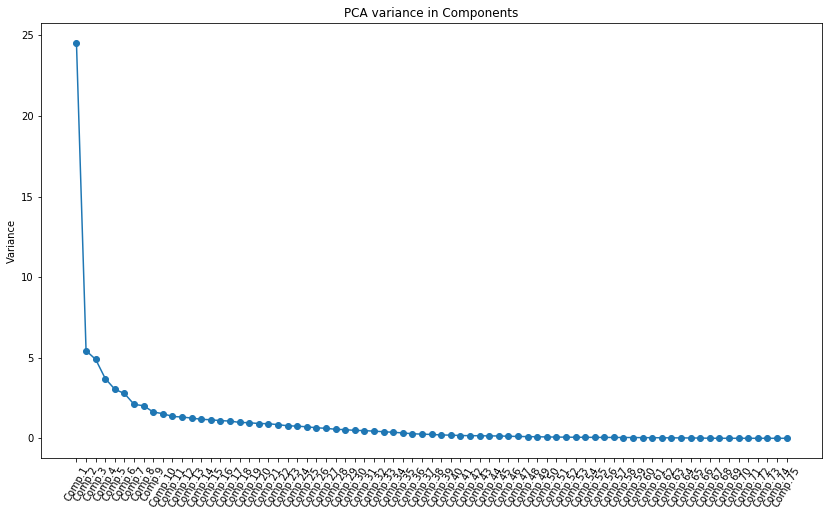

<Figure size 1008x576 with 0 Axes>

In [45]:
plt.rcParams['figure.figsize'] = 14, 8
screeplot(pca, standardisedX)
plt.savefig('./images/pca_components_variance_research_items' + '.png')

# 1 to 2 has the most slope. where comp 8 can be seen as the start of the line. 


# Will check upto 7 components

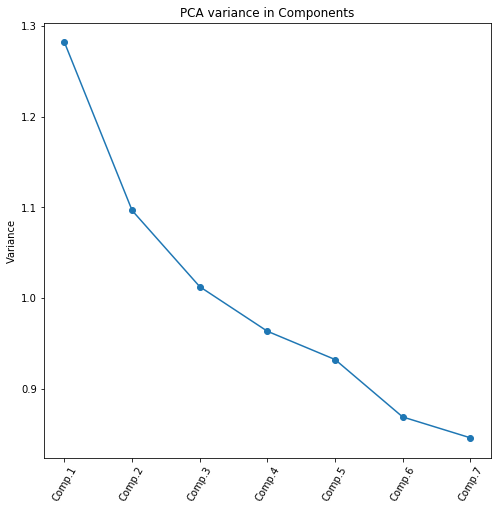

<Figure size 576x576 with 0 Axes>

In [46]:
plt.rcParams['figure.figsize'] = 8, 8
screeplot(pca_food, standardisedX_food)
plt.savefig('./images/pca_components_variance_research_items_food' + '.png')            


# 2 to 3 has the most slope

Up to component 5 will be checked

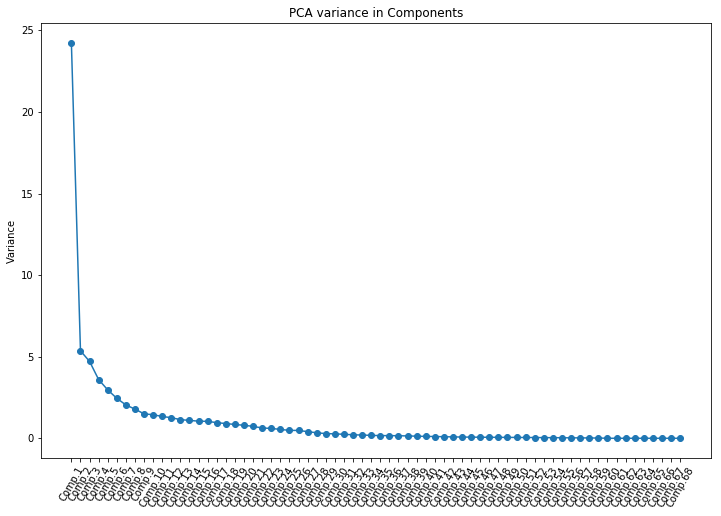

<Figure size 864x576 with 0 Axes>

In [47]:
plt.rcParams['figure.figsize'] = 12, 8
screeplot(pca_nutrients, standardisedX_nutrients)
plt.savefig('./images/pca_components_variance_research_items_nutrients' + '.png')            


# Slopes from 1 to 2  or 2 to 3 seems equal. Comp 8 can be seen as the starting point of a line

# Up to 7 or 8 will be checked

# comp 2 to comp 3 is the most change - slope
# first two or at best first 3 can be retained

Component 8 is the first point for line, considering that upto 7 can be retained
#summary.sdev**2

In [48]:
pca.components_[0]
np.sum(pca.components_[0]**2)

1.0000000000000004

In [49]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [50]:
calcpc(standardisedX, pca.components_[0]), calcpc(standardisedX_food, pca_food.components_[0]), calcpc(standardisedX_nutrients, pca_nutrients.components_[0])

(array([ 3.04712818,  4.93812934,  3.29735527, ...,  4.56737452,
         5.73579422, -3.50040865]),
 array([ 0.2530255 ,  1.99269337,  0.38580546, ...,  0.34209815,
         0.13718759, -0.84881559]),
 array([ 2.96528691,  4.83007605,  3.19054194, ...,  4.48957635,
         5.71741492, -3.41339331]))

In [52]:
pca.transform(standardisedX)[:, 0]
pca_food.transform(standardisedX_food)[:, 0]
pca_nutrients.transform(standardisedX_nutrients)[:, 0]

array([ 2.96528691,  4.83007605,  3.19054194, ...,  4.48957635,
        5.71741492, -3.41339331])

In [53]:
#pca.components_[1]

In [54]:
np.sum(pca.components_[1]**2), np.sum(pca_food.components_[1]**2), np.sum(pca_nutrients.components_[1]**2)

(0.9999999999999994, 1.0000000000000009, 0.9999999999999988)

In [55]:
#highest loadings for

# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work
df_drop_pca['acr'][:3]
#sorted(standardisedX['acr'])

0      6.10
1     12.82
2    150.00
Name: acr, dtype: float64

In [56]:
dbk= np.where(df_drop_pca['acr'] < 30, 'normal-mild', df_drop_pca['acr'])
dbk = np.where(df_drop_pca['acr'] > 30, 'moderate', df_drop_pca['acr'])
dbk

y = []
for aVal in df_drop_pca['acr']:
    if aVal < 30:
        y.append('normal-mild')
    if aVal > 300:
        y.append('severe')
    elif aVal < 150:
        y.append('mild-moderate-low')
    elif aVal > 150:
        #print(aVal)
        y.append('mild-moderate-high')
        
y        

['normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-high',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mil

<Figure size 864x576 with 0 Axes>

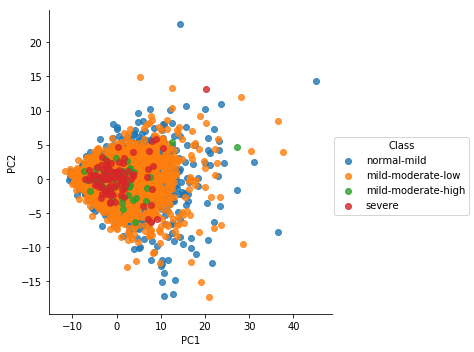

In [57]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    plt.savefig('./images/pca_components_separating_high_low_acr' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)
plt.savefig('./images/pca_components_separating_high_low_acr_overall' + '.png')

<Figure size 864x576 with 0 Axes>

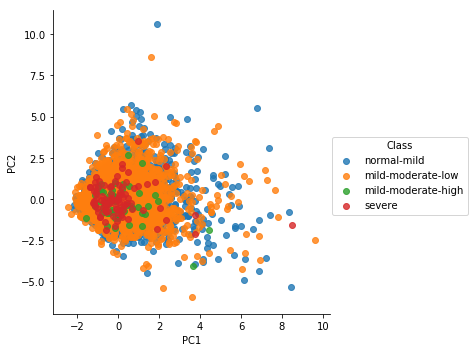

In [58]:
pca_scatter(pca_food, standardisedX_food, y)
plt.savefig('./images/pca_components_separating_high_low_acr_food' + '.png')

<Figure size 864x576 with 0 Axes>

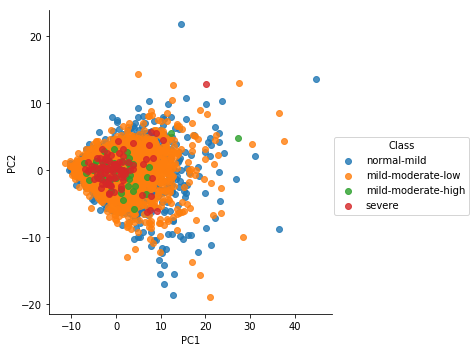

In [59]:
pca_scatter(pca_nutrients, standardisedX_nutrients, y)
plt.savefig('./images/pca_components_separating_high_low_acr_nutrients' + '.png')

<Figure size 864x576 with 0 Axes>

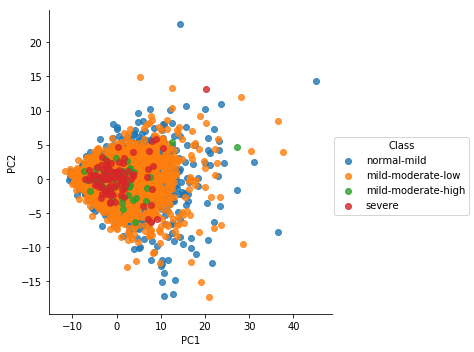

In [60]:
pca_scatter(pca, standardisedX, y)
plt.savefig('./images/pca_components_separating_high_low_acr' + '.png')

# see what are affecting in the first two components

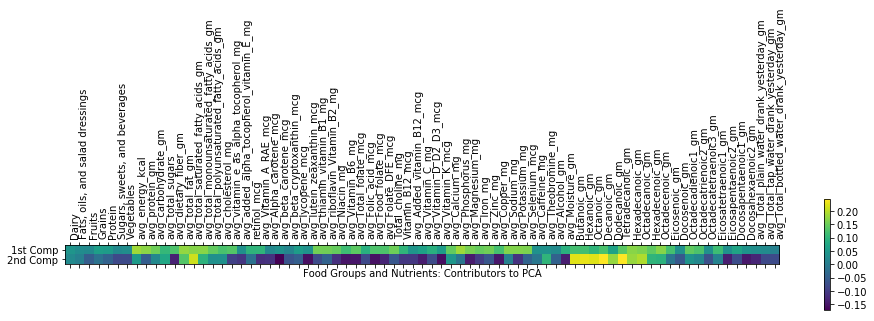

In [61]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 16, 16
pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=90,ha='left')
plt.savefig('./images/pca_all_research_items_what_contributes_to_PCA_components' + '.png')     
plt.xlabel('Food Groups and Nutrients: Contributors to PCA')
#plt.title('Food Groups and Nutrients: Contributors to PCA')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

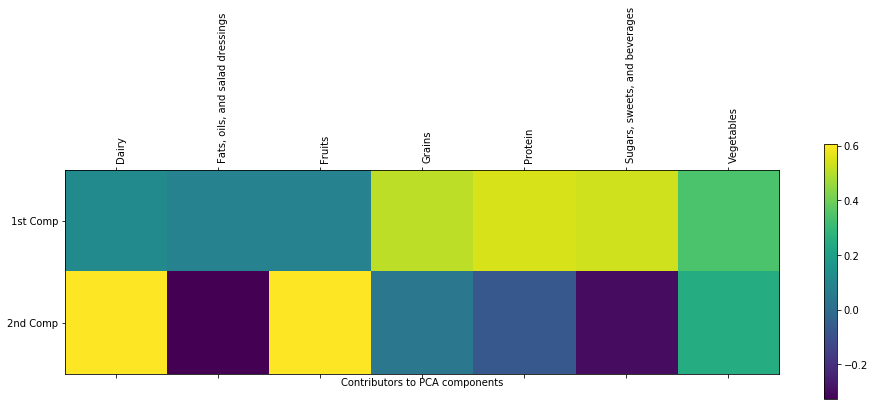

In [62]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca_food.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX_food.columns)),standardisedX_food.columns,rotation=90,ha='left')
plt.savefig('./images/pca_food_group_items_what_contributes_to_PCA_components' + '.png')  
plt.xlabel('Contributors to PCA components')
plt.show()# 

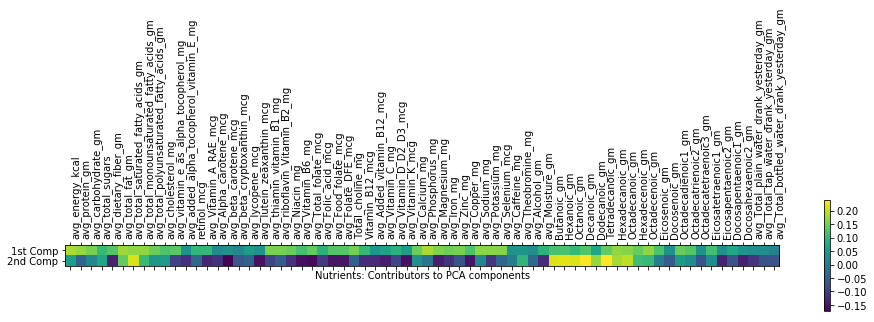

In [63]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca_nutrients.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX_nutrients.columns)),standardisedX_nutrients.columns,rotation=90,ha='left')
plt.savefig('./images/pca_food_nutrient_items_what_contributes_to_PCA_components' + '.png') 
plt.xlabel('Nutrients: Contributors to PCA components')
plt.show()# 

# all items : see contributions upto 8 components

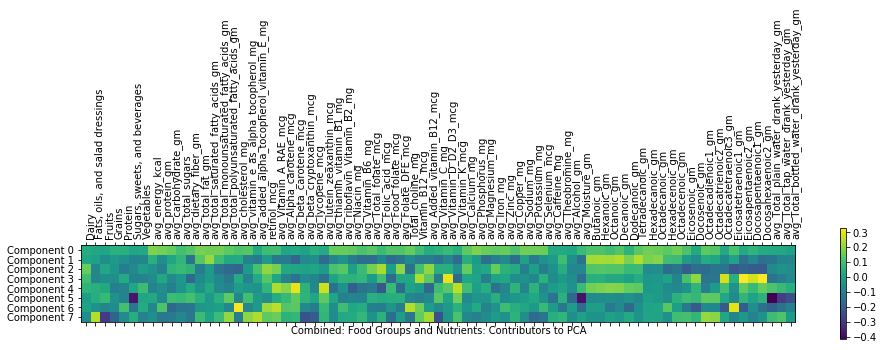

In [64]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 8

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=90,ha='left')
plt.xlabel('Combined: Food Groups and Nutrients: Contributors to PCA')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

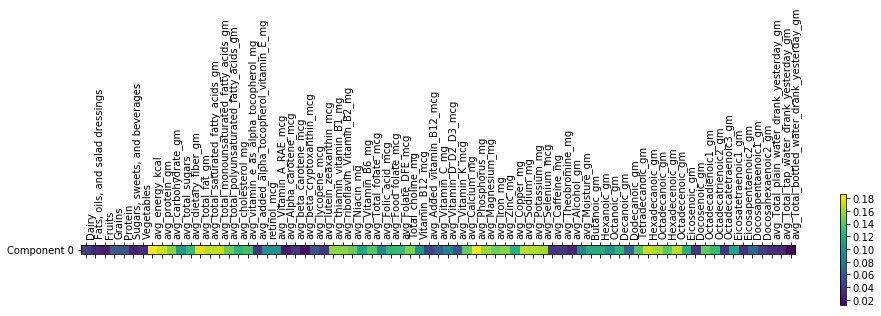

In [65]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 1

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=90,ha='left')
plt.show()# 

In [66]:
# for Food upto 4 components

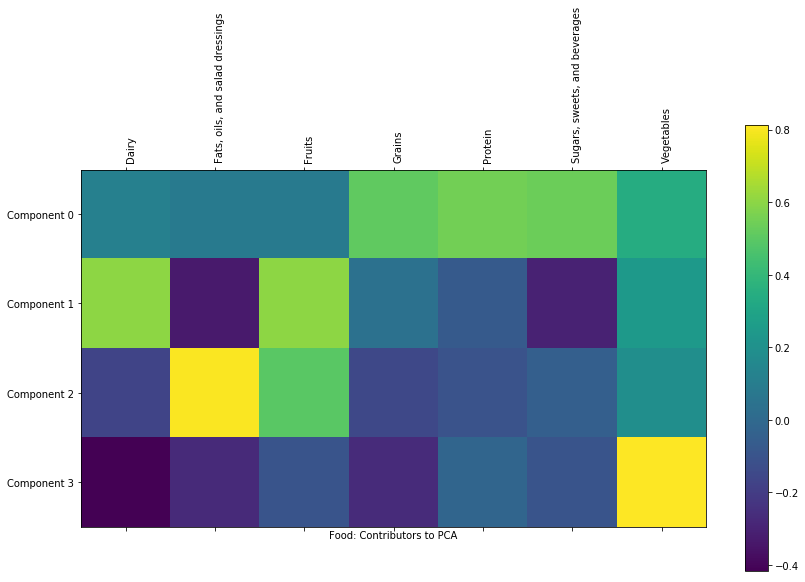

In [67]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 16, 8
components_to_count = 4

pca_components_cont = pca_food.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX_food.columns)),standardisedX_food.columns,rotation=90,ha='left')
plt.xlabel('Food: Contributors to PCA')
plt.show()

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

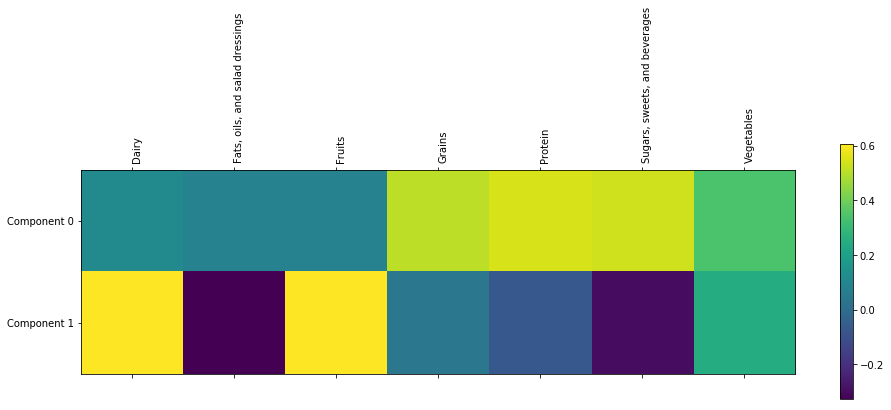

In [68]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 2

pca_components_cont = pca_food.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX_food.columns)),standardisedX_food.columns,rotation=90,ha='left')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

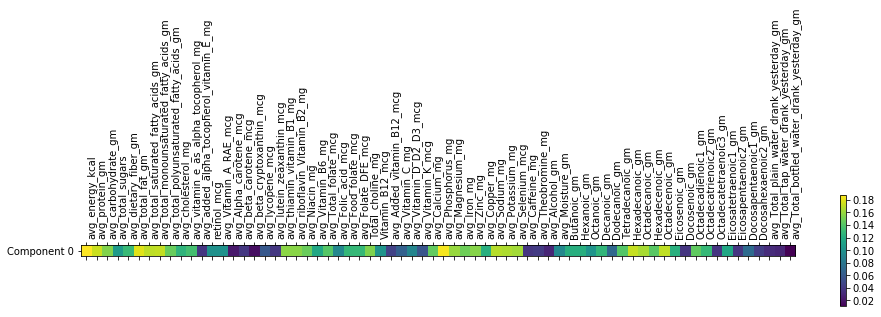

In [69]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 1

pca_components_cont = pca_nutrients.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX_nutrients.columns)),standardisedX_nutrients.columns,rotation=90,ha='left')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component


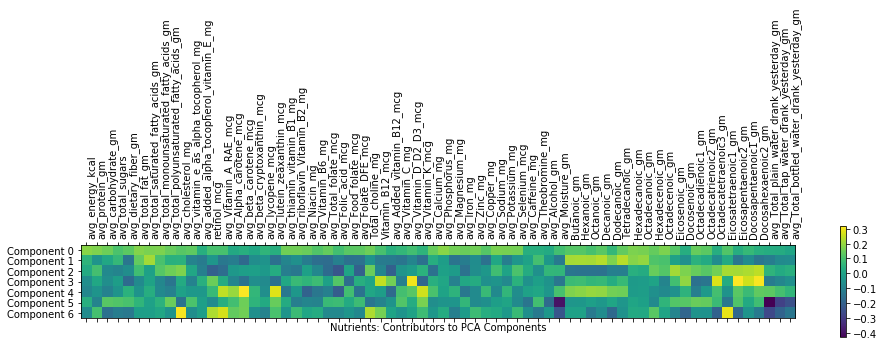

In [70]:

# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 7

pca_components_cont = pca_nutrients.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(standardisedX_nutrients.columns)),standardisedX_nutrients.columns,rotation=90,ha='left')
plt.xlabel('Nutrients: Contributors to PCA Components')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

In [71]:
# will now create heatmaps for all of the stuff that seemed to be affecting: food items and nutrients
# all food items as considering how many components we take, all food items affecting probably in a different dimension
# nutrients that will consider: kcal, protein, carbo, fat, luten to niacin, choline, calcium, phos, mag, iron, sodium, copper potassiusn, selenium, hexa, octa


df_drop_pca_research_items_affecting = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
#'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 # data probably is not correct: further calculation and verification required
 # also these are not the focus
 #'age_from_recom_amount',
 #'avg_taken_from_recom_amount',
 #'recommended_low',
 #'recommended_high',
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 
 #'avg_Vitamin_B6_mg',
 #'avg_Total_folate_mcg',
 #'avg_Folic_acid_mcg',
 #'avg_Food_folate_mcg',
 #'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 #'Vitamin_B12_mcg',
 #'avg_Added_vitamin_B12_mcg',
 #'avg_Vitamin_C_mg',
 #'avg_Vitamin_D_D2_D3_mcg',
 #'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 #'avg_Caffeine_mg',
 #'avg_Theobromine_mg',
 #'avg_Alcohol_gm',
 #'avg_Moisture_gm',
                 
 #'Butanoic_gm',
 #'Hexanoic_gm',
 #'Octanoic_gm',
 #'Decanoic_gm',
 #'Dodecanoic_gm',
 #'Tetradecanoic_gm',
 #'Hexadecanoic_gm',
 #'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 #'Eicosenoic_gm',
 #'Docosenoic_gm',
 #'Octadecadienoic1_gm',
 #'Octadecatrienoic2_gm',
 #'Octadecatetraenoic3_gm',
 #'Eicosatetraenoic1_gm',
 #'Eicosapentaenoic2_gm',
 #'Docosapentaenoic1_gm',
 #'Docosahexaenoic2_gm',
 #'avg_Total_plain_water_drank_yesterday_gm',
 #'avg_Total_tap_water_drank_yesterday_gm',
 #'avg_Total_bottled_water_drank_yesterday_gm'
 'acr'
                               
    ]
]


In [72]:
#df_drop_pca_research_items_affecting.corr()

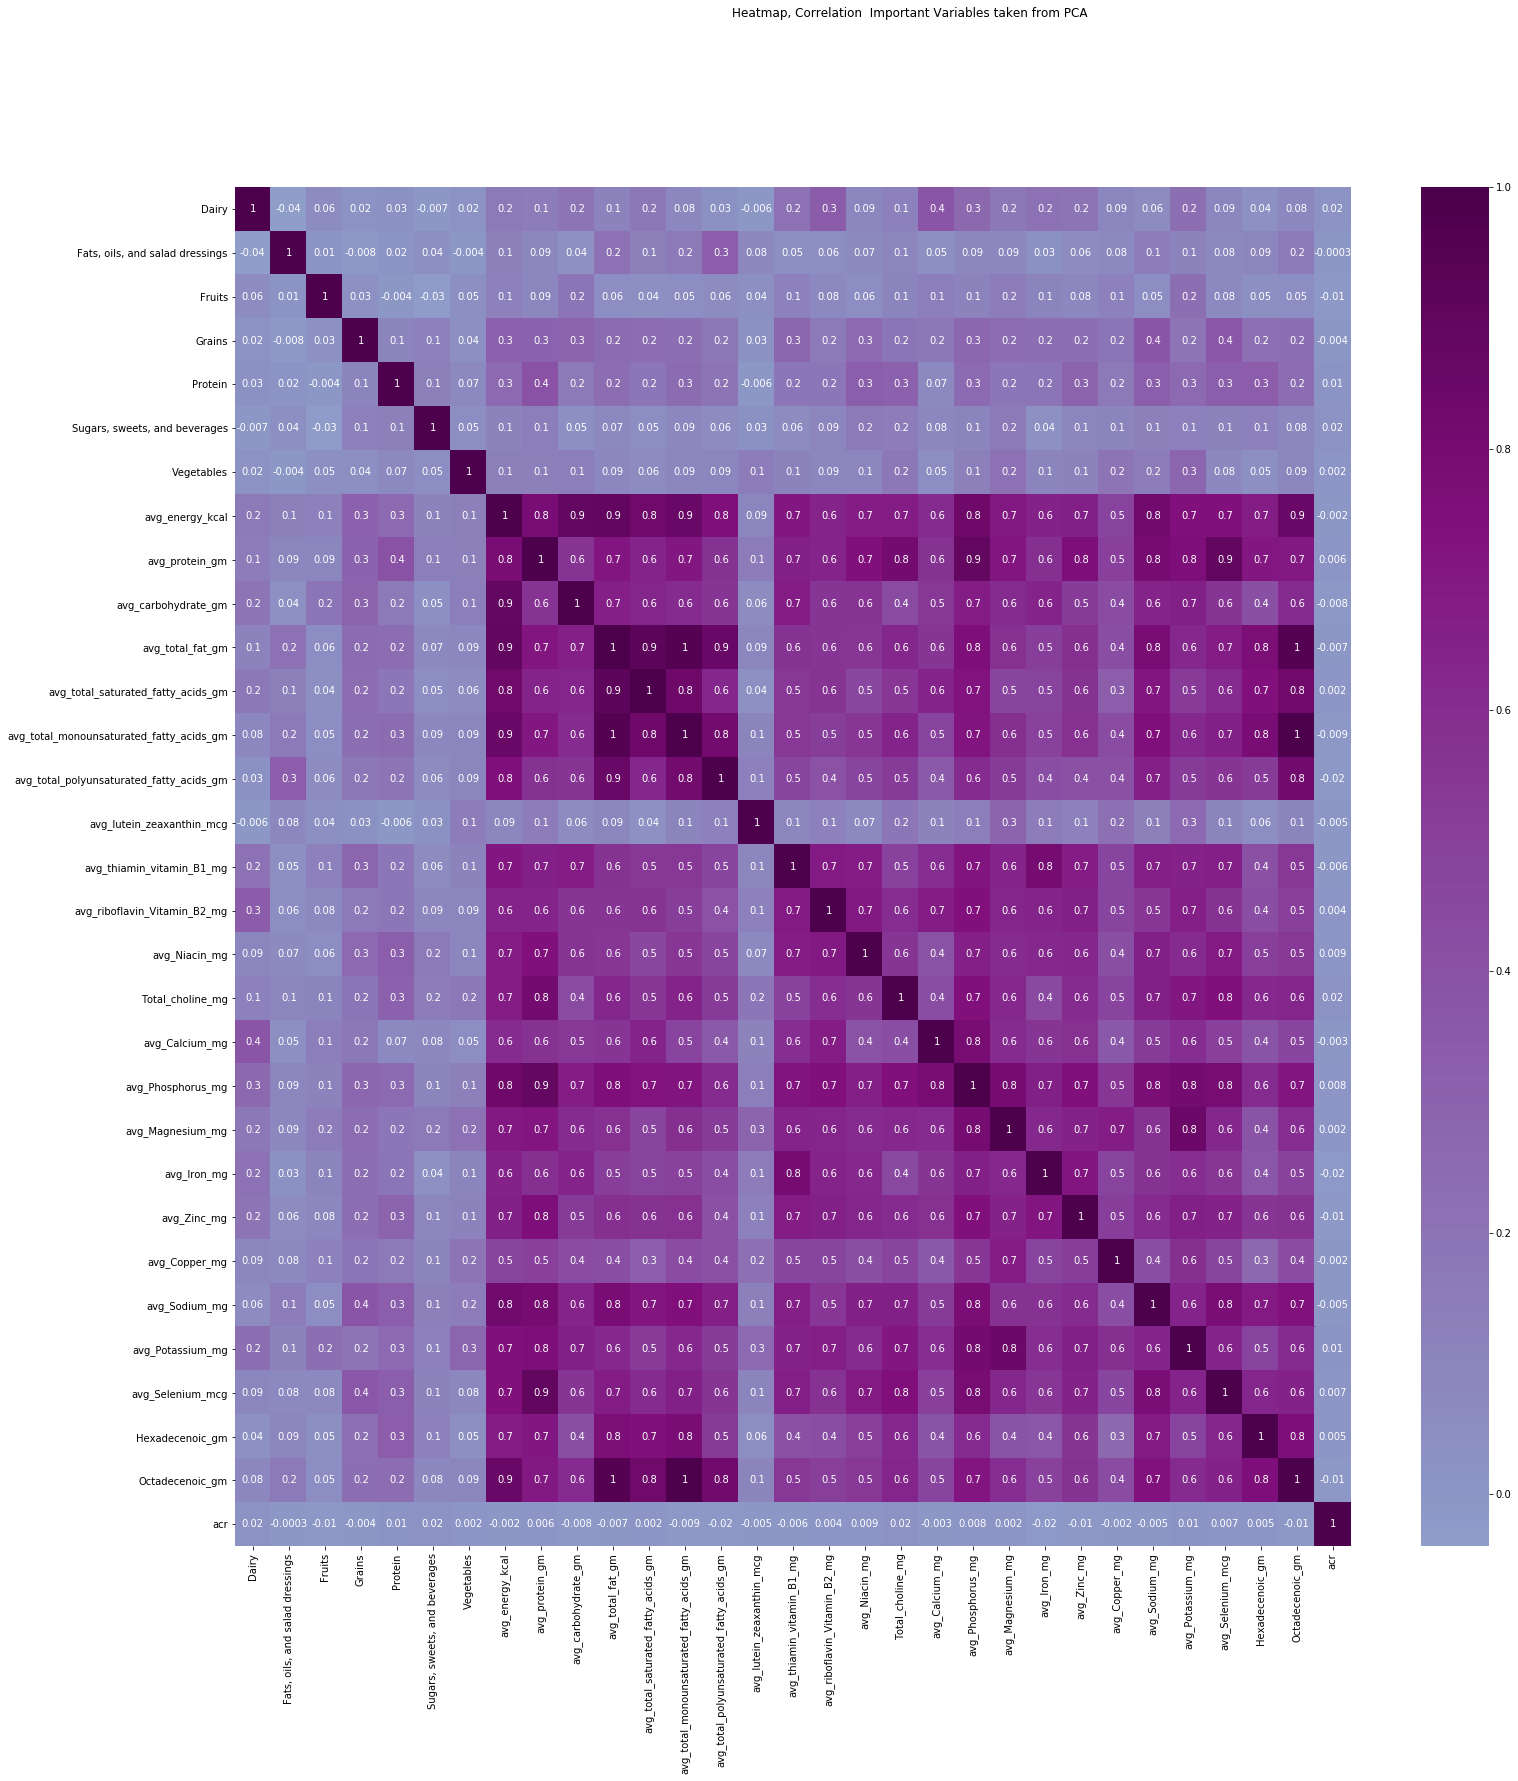

In [73]:
plt.figure(figsize=(25, 25))

standardisedX_affecting = sklearn.preprocessing.scale(df_drop_pca_research_items_affecting)
standardisedX_affecting = pd.DataFrame(df_drop_pca_research_items_affecting, index=df_drop_pca_research_items_affecting.index, columns=df_drop_pca_research_items_affecting.columns)

corr = standardisedX_affecting.corr() #df_drop_pca_research_items_affecting.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu",
            center=0
            , fmt='.1g'
           
           );
plt.suptitle('Heatmap, Correlation  Important Variables taken from PCA');
plt.savefig('Regression ACR with combined Food Groups and Nutrients')
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [74]:
# will now create heatmaps for all of the stuff that seemed to be affecting: food items and nutrients
# all food items as considering how many components we take, all food items affecting probably in a different dimension
# nutrients that will consider: kcal, protein, carbo, fat, luten to niacin, choline, calcium, phos, mag, iron, sodium, copper potassiusn, selenium, hexa, octa

df_drop_pca_research_items_affecting_food = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
#'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 'acr'
                               
    ]
]


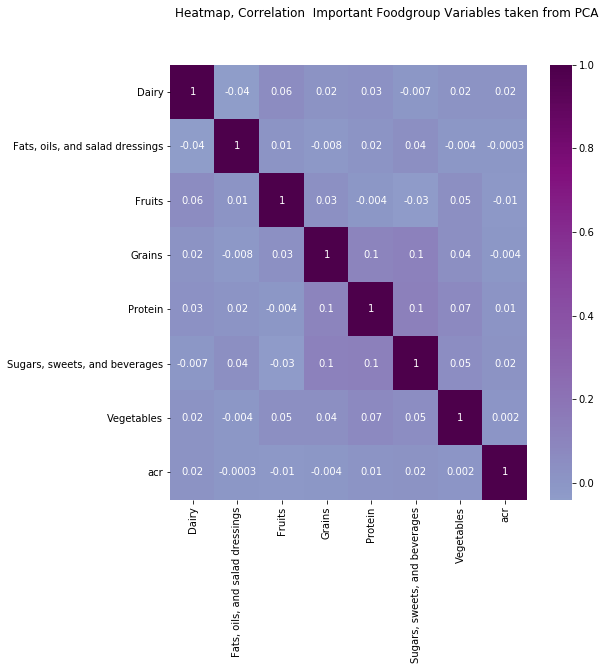

In [75]:
#sns.set_palette('RdBu')
plt.figure(figsize=(8, 8))

#df_drop_pca_research_items_affecting_food = (df_drop_pca_research_items_affecting_food - df_drop_pca_research_items_affecting_food.mean())/ (df_drop_pca_research_items_affecting_food.max() - df_drop_pca_research_items_affecting_food.min())

standardisedX_food_affecting = sklearn.preprocessing.scale(df_drop_pca_research_items_affecting_food)
standardisedX_food_affecting = pd.DataFrame(standardisedX_food_affecting, index=df_drop_pca_research_items_affecting_food.index, columns=df_drop_pca_research_items_affecting_food.columns)

corr = standardisedX_food_affecting.corr() #df_drop_pca_research_items_affecting.corr()



#corr = df_drop_pca_research_items_affecting_food.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
            cmap="BuPu",
            center=0
            ,fmt='.1g'
           );
plt.suptitle('Heatmap, Correlation  Important Foodgroup Variables taken from PCA');

# plot using a color palette
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

In [76]:
# will now create heatmaps for all of the stuff that seemed to be affecting: food items and nutrients
# all food items as considering how many components we take, all food items affecting probably in a different dimension
# nutrients that will consider: kcal, protein, carbo, fat, luten to niacin, choline, calcium, phos, mag, iron, sodium, copper potassiusn, selenium, hexa, octa


df_drop_pca_research_items_affecting_nutrients = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 
 'Total_choline_mg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
                 
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'acr'
                               
    ]
]


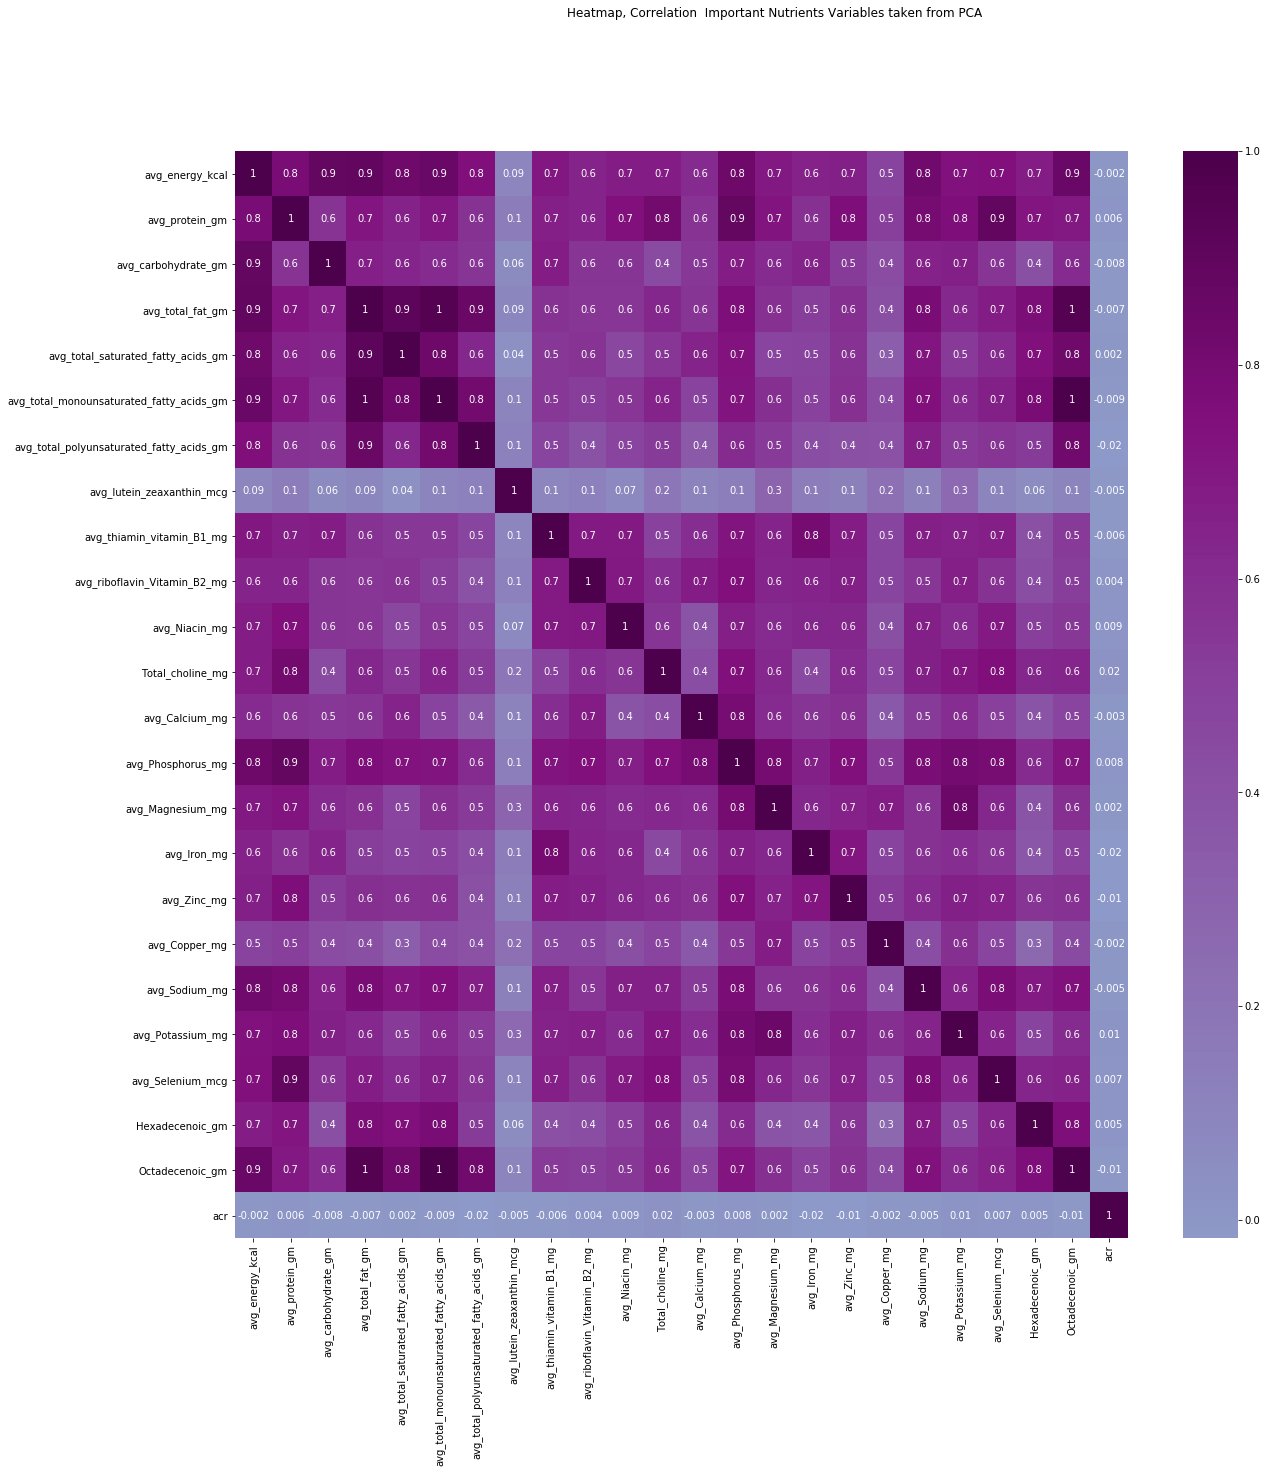

In [77]:
plt.figure(figsize=(20, 20))

df_drop_pca_research_items_affecting_nutrients = (df_drop_pca_research_items_affecting_nutrients - df_drop_pca_research_items_affecting_nutrients.mean())/ (df_drop_pca_research_items_affecting_nutrients.max() - df_drop_pca_research_items_affecting_nutrients.min())
corr = df_drop_pca_research_items_affecting_nutrients.corr()

#standardisedX_nutrients_affecting = sklearn.preprocessing.scale(df_drop_pca_research_items_affecting_nutrients)
#standardisedX_nutrients_affecting = pd.DataFrame(standardisedX, index=df_drop_pca_research_items_affecting_nutrients.index, columns=df_drop_pca_research_items_affecting_nutrients.columns)
#corr = standardisedX_nutrients_affecting.corr() #df_drop_pca_research_items_affecting.corr()

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,           
            cmap="BuPu",
            center=0
            ,fmt='.1g'           
           ); #, fmt='.1g'
plt.suptitle('Heatmap, Correlation  Important Nutrients Variables taken from PCA');
plt.savefig('./images/regression_nutrients_acr_data_not_normalized.png')


# some code from below can be seen useful though can be ignored for now

In [78]:
df_drop_pca_research_items['acr'] = merged_individual_foods_and_nutrients_df['acr']
df_drop_pca_research_items.columns

Index(['acr', 'Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'avg_energy_kcal', 'avg_protein_gm', 'avg_carbohydrate_gm',
       'avg_total_sugars', 'avg_dietary_fiber_gm', 'avg_total_fat_gm',
       'avg_total_saturated_fatty_acids_gm',
       'avg_total_monounsaturated_fatty_acids_gm',
       'avg_total_polyunsaturated_fatty_acids_gm', 'avg_cholesterol_mg',
       'avg_vitamin_e_as_alpha_tocopherol_mg',
       'avg_added_alpha_tocopherol_vitamin_E_mg', 'retinol_mcg',
       'avg_Vitamin_A_RAE_mcg', 'avg_Alpha_carotene_mcg',
       'avg_beta_carotene_mcg', 'avg_beta_cryptoxanthin_mcg',
       'avg_lycopene_mcg', 'avg_lutein_zeaxanthin_mcg',
       'avg_thiamin_vitamin_B1_mg', 'avg_riboflavin_Vitamin_B2_mg',
       'avg_Niacin_mg', 'avg_Vitamin_B6_mg', 'avg_Total_folate_mcg',
       'avg_Folic_acid_mcg', 'avg_Food_folate_mcg', 'avg_Folate_DFE_mcg',
       'Total_choline_mg', 'Vitamin_B12_mcg', 'avg_

In [79]:
df_drop_pca_research_items.corr()

,acr,Dairy,"Fats, oils, and salad dressings",Fruits,Grains,Protein,"Sugars, sweets, and beverages",Vegetables,avg_energy_kcal,avg_protein_gm,avg_carbohydrate_gm,avg_total_sugars,avg_dietary_fiber_gm,avg_total_fat_gm,avg_total_saturated_fatty_acids_gm,avg_total_monounsaturated_fatty_acids_gm,avg_total_polyunsaturated_fatty_acids_gm,avg_cholesterol_mg,avg_vitamin_e_as_alpha_tocopherol_mg,avg_added_alpha_tocopherol_vitamin_E_mg,retinol_mcg,avg_Vitamin_A_RAE_mcg,avg_Alpha_carotene_mcg,avg_beta_carotene_mcg,avg_beta_cryptoxanthin_mcg,avg_lycopene_mcg,avg_lutein_zeaxanthin_mcg,avg_thiamin_vitamin_B1_mg,avg_riboflavin_Vitamin_B2_mg,avg_Niacin_mg,avg_Vitamin_B6_mg,avg_Total_folate_mcg,avg_Folic_acid_mcg,avg_Food_folate_mcg,avg_Folate_DFE_mcg,Total_choline_mg,Vitamin_B12_mcg,avg_Added_vitamin_B12_mcg,avg_Vitamin_C_mg,avg_Vitamin_D_D2_D3_mcg,avg_Vitamin_K_mcg,avg_Calcium_mg,avg_Phosphorus_mg,avg_Magnesium_mg,avg_Iron_mg,avg_Zinc_mg,avg_Copper_mg,avg_Sodium_mg,avg_Potassium_mg,avg_Selenium_mcg,avg_Caffeine_mg,avg_Theobromine_mg,avg_Alcohol_gm,avg_Moisture_gm,Butanoic_gm,Hexanoic_gm,Octanoic_gm,Decanoic_gm,Dodecanoic_gm,Tetradecanoic_gm,Hexadecanoic_gm,Octadecanoic_gm,Hexadecenoic_gm,Octadecenoic_gm,Eicosenoic_gm,Docosenoic_gm,Octadecadienoic1_gm,Octadecatrienoic2_gm,Octadecatetraenoic3_gm,Eicosatetraenoic1_gm,Eicosapentaenoic2_gm,Docosapentaenoic1_gm,Docosahexaenoic2_gm,avg_Total_plain_water_drank_yesterday_gm,avg_Total_tap_water_drank_yesterday_gm,avg_Total_bottled_water_drank_yesterday_gm
acr,1.000000,0.017986,-0.000536,-0.010793,-0.005046,0.009906,0.017398,0.001188,-0.003055,0.004979,-0.008421,-0.000922,-0.016832,-0.007551,0.001557,-0.010390,-0.016247,0.009397,-0.017247,-0.004949,0.016331,0.014152,0.009063,0.000971,0.009288,-0.021449,-0.005764,-0.006693,0.003681,0.007844,0.008648,-0.007078,-0.005455,-0.005379,-0.006757,0.023113,0.026770,-0.006389,0.006130,0.081883,-0.007086,-0.002700,0.007067,0.000513,-0.017902,-0.015883,-0.002709,-0.006006,0.011567,0.006306,-0.002970,-0.013990,0.018564,0.012073,0.015239,0.012001,0.001376,0.006176,0.002859,0.009811,0.000049,0.001002,0.004298,-0.011709,0.056133,0.009079,-0.019404,-0.011879,0.070222,0.003312,0.069019,0.056182,0.079081,-0.000015,-0.004695,0.005096
Dairy,0.017986,1.000000,-0.039729,0.064648,0.022838,0.029117,-0.006897,0.020622,0.163875,0.148636,0.203047,0.235831,0.126876,0.112301,0.177414,0.080526,0.031877,0.037953,0.079148,0.066901,0.288265,0.230740,0.030512,0.006926,0.000468,0.015513,-0.005637,0.204308,0.344275,0.093063,0.130521,0.189776,0.197161,0.077305,0.200064,0.124350,0.217062,0.147353,0.063914,0.400333,-0.008877,0.378886,0.266205,0.173932,0.216371,0.202193,0.089369,0.063631,0.233256,0.090144,-0.080726,0.122841,-0.060411,0.012404,0.287741,0.300641,0.227705,0.243483,0.107903,0.233927,0.148572,0.139237,0.040199,0.081690,0.017263,-0.008950,0.029433,0.048382,0.019654,-0.028851,-0.007881,0.000128,-0.004374,-0.052073,-0.013793,-0.052196
"Fats, oils, and salad dressings",-0.000536,-0.039729,1.000000,0.013228,-0.008416,0.017072,0.044024,-0.003734,0.131064,0.087339,0.038971,0.062268,0.038608,0.211542,0.128678,0.165633,0.332730,0.099130,0.143710,0.007816,0.038182,0.083510,0.068327,0.089804,0.004945,0.010601,0.078856,0.049579,0.055237,0.066607,0.051374,0.040431,-0.019341,0.096978,0.020692,0.099458,0.024331,-0.005961,0.048910,0.010233,0.167195,0.049365,0.089574,0.085709,0.031413,0.059461,0.076108,0.143594,0.114802,0.075756,0.071482,0.006375,0.050805,0.127549,0.084932,0.090984,0.065431,0.097912,0.037495,0.076900,0.139451,0.122503,0.094549,0.167371,0.137534,0.074655,0.323845,0.377853,0.011838,0.100400,0.029105,0.053012,0.040028,0.082462,0.053973,0.047679
Fruits,-0.010793,0.064648,0.013228,1.000000,0.034518,-0.004125,-0.031997,0.049500,0.121896,0.089029,0.189086,0.198509,0.169687,0.056470,0.044144,0.050508,0.058358,0.079119,0.069732,-0.004910,0.047021,0.067605,0.006727,0.050979,0.232517,0.130088,0.042734,0.118676,0.077868,0.057207,0.086021,0.122880,0.044216,0.159772,0.099884,0.103168,0.013962,-0.

In [80]:
#df = pd.read_csv('mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
#df = df.drop( ['Recommended Sugars sweets and beverages amount', ' % Population got CKD', ' People (or %) progressed to Stage 3 CKD', ' People (or %) progressed to Stage 4 CKD', ' People (or %) progressed to ESRD', ' Received dietitian care (Optional)', ' Did not Receive dietitian care (Optional)', ' Patients went for dialysis', ' Patients went for Kidney Transplantation' ], axis=1)
#df.head()

In [81]:
df_drop_pca_research_items.corr()

,acr,Dairy,"Fats, oils, and salad dressings",Fruits,Grains,Protein,"Sugars, sweets, and beverages",Vegetables,avg_energy_kcal,avg_protein_gm,avg_carbohydrate_gm,avg_total_sugars,avg_dietary_fiber_gm,avg_total_fat_gm,avg_total_saturated_fatty_acids_gm,avg_total_monounsaturated_fatty_acids_gm,avg_total_polyunsaturated_fatty_acids_gm,avg_cholesterol_mg,avg_vitamin_e_as_alpha_tocopherol_mg,avg_added_alpha_tocopherol_vitamin_E_mg,retinol_mcg,avg_Vitamin_A_RAE_mcg,avg_Alpha_carotene_mcg,avg_beta_carotene_mcg,avg_beta_cryptoxanthin_mcg,avg_lycopene_mcg,avg_lutein_zeaxanthin_mcg,avg_thiamin_vitamin_B1_mg,avg_riboflavin_Vitamin_B2_mg,avg_Niacin_mg,avg_Vitamin_B6_mg,avg_Total_folate_mcg,avg_Folic_acid_mcg,avg_Food_folate_mcg,avg_Folate_DFE_mcg,Total_choline_mg,Vitamin_B12_mcg,avg_Added_vitamin_B12_mcg,avg_Vitamin_C_mg,avg_Vitamin_D_D2_D3_mcg,avg_Vitamin_K_mcg,avg_Calcium_mg,avg_Phosphorus_mg,avg_Magnesium_mg,avg_Iron_mg,avg_Zinc_mg,avg_Copper_mg,avg_Sodium_mg,avg_Potassium_mg,avg_Selenium_mcg,avg_Caffeine_mg,avg_Theobromine_mg,avg_Alcohol_gm,avg_Moisture_gm,Butanoic_gm,Hexanoic_gm,Octanoic_gm,Decanoic_gm,Dodecanoic_gm,Tetradecanoic_gm,Hexadecanoic_gm,Octadecanoic_gm,Hexadecenoic_gm,Octadecenoic_gm,Eicosenoic_gm,Docosenoic_gm,Octadecadienoic1_gm,Octadecatrienoic2_gm,Octadecatetraenoic3_gm,Eicosatetraenoic1_gm,Eicosapentaenoic2_gm,Docosapentaenoic1_gm,Docosahexaenoic2_gm,avg_Total_plain_water_drank_yesterday_gm,avg_Total_tap_water_drank_yesterday_gm,avg_Total_bottled_water_drank_yesterday_gm
acr,1.000000,0.017986,-0.000536,-0.010793,-0.005046,0.009906,0.017398,0.001188,-0.003055,0.004979,-0.008421,-0.000922,-0.016832,-0.007551,0.001557,-0.010390,-0.016247,0.009397,-0.017247,-0.004949,0.016331,0.014152,0.009063,0.000971,0.009288,-0.021449,-0.005764,-0.006693,0.003681,0.007844,0.008648,-0.007078,-0.005455,-0.005379,-0.006757,0.023113,0.026770,-0.006389,0.006130,0.081883,-0.007086,-0.002700,0.007067,0.000513,-0.017902,-0.015883,-0.002709,-0.006006,0.011567,0.006306,-0.002970,-0.013990,0.018564,0.012073,0.015239,0.012001,0.001376,0.006176,0.002859,0.009811,0.000049,0.001002,0.004298,-0.011709,0.056133,0.009079,-0.019404,-0.011879,0.070222,0.003312,0.069019,0.056182,0.079081,-0.000015,-0.004695,0.005096
Dairy,0.017986,1.000000,-0.039729,0.064648,0.022838,0.029117,-0.006897,0.020622,0.163875,0.148636,0.203047,0.235831,0.126876,0.112301,0.177414,0.080526,0.031877,0.037953,0.079148,0.066901,0.288265,0.230740,0.030512,0.006926,0.000468,0.015513,-0.005637,0.204308,0.344275,0.093063,0.130521,0.189776,0.197161,0.077305,0.200064,0.124350,0.217062,0.147353,0.063914,0.400333,-0.008877,0.378886,0.266205,0.173932,0.216371,0.202193,0.089369,0.063631,0.233256,0.090144,-0.080726,0.122841,-0.060411,0.012404,0.287741,0.300641,0.227705,0.243483,0.107903,0.233927,0.148572,0.139237,0.040199,0.081690,0.017263,-0.008950,0.029433,0.048382,0.019654,-0.028851,-0.007881,0.000128,-0.004374,-0.052073,-0.013793,-0.052196
"Fats, oils, and salad dressings",-0.000536,-0.039729,1.000000,0.013228,-0.008416,0.017072,0.044024,-0.003734,0.131064,0.087339,0.038971,0.062268,0.038608,0.211542,0.128678,0.165633,0.332730,0.099130,0.143710,0.007816,0.038182,0.083510,0.068327,0.089804,0.004945,0.010601,0.078856,0.049579,0.055237,0.066607,0.051374,0.040431,-0.019341,0.096978,0.020692,0.099458,0.024331,-0.005961,0.048910,0.010233,0.167195,0.049365,0.089574,0.085709,0.031413,0.059461,0.076108,0.143594,0.114802,0.075756,0.071482,0.006375,0.050805,0.127549,0.084932,0.090984,0.065431,0.097912,0.037495,0.076900,0.139451,0.122503,0.094549,0.167371,0.137534,0.074655,0.323845,0.377853,0.011838,0.100400,0.029105,0.053012,0.040028,0.082462,0.053973,0.047679
Fruits,-0.010793,0.064648,0.013228,1.000000,0.034518,-0.004125,-0.031997,0.049500,0.121896,0.089029,0.189086,0.198509,0.169687,0.056470,0.044144,0.050508,0.058358,0.079119,0.069732,-0.004910,0.047021,0.067605,0.006727,0.050979,0.232517,0.130088,0.042734,0.118676,0.077868,0.057207,0.086021,0.122880,0.044216,0.159772,0.099884,0.103168,0.013962,-0.

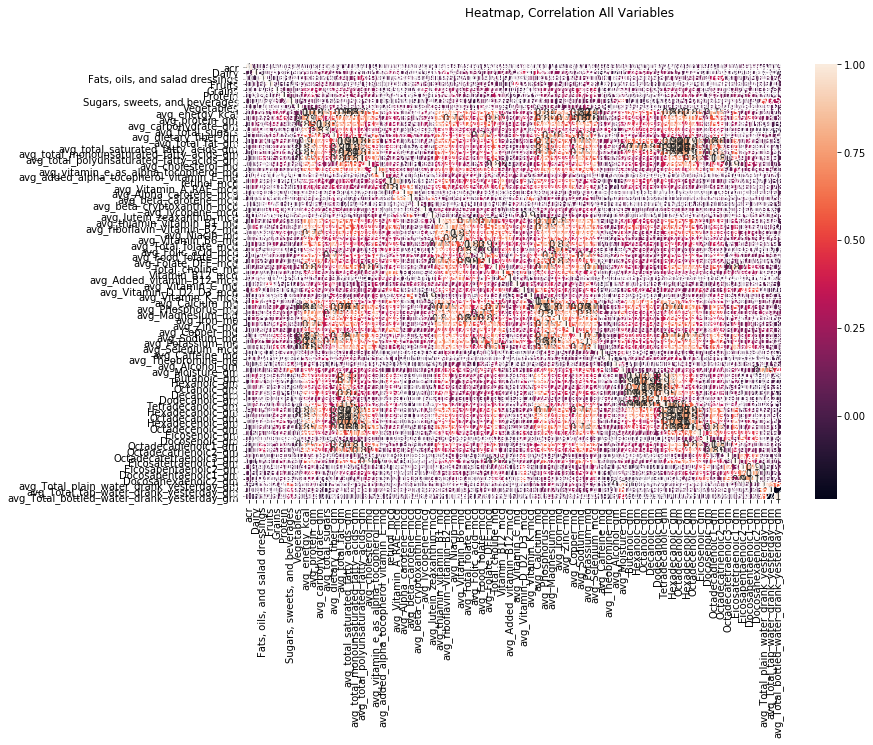

In [82]:
plt.figure(figsize=(12, 8))

corr = df_drop_pca_research_items.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation All Variables');

In [83]:
# The above plot kind of shows the correlation with CKD and ACR
df_drop_pca_research_items.columns

Index(['acr', 'Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'avg_energy_kcal', 'avg_protein_gm', 'avg_carbohydrate_gm',
       'avg_total_sugars', 'avg_dietary_fiber_gm', 'avg_total_fat_gm',
       'avg_total_saturated_fatty_acids_gm',
       'avg_total_monounsaturated_fatty_acids_gm',
       'avg_total_polyunsaturated_fatty_acids_gm', 'avg_cholesterol_mg',
       'avg_vitamin_e_as_alpha_tocopherol_mg',
       'avg_added_alpha_tocopherol_vitamin_E_mg', 'retinol_mcg',
       'avg_Vitamin_A_RAE_mcg', 'avg_Alpha_carotene_mcg',
       'avg_beta_carotene_mcg', 'avg_beta_cryptoxanthin_mcg',
       'avg_lycopene_mcg', 'avg_lutein_zeaxanthin_mcg',
       'avg_thiamin_vitamin_B1_mg', 'avg_riboflavin_Vitamin_B2_mg',
       'avg_Niacin_mg', 'avg_Vitamin_B6_mg', 'avg_Total_folate_mcg',
       'avg_Folic_acid_mcg', 'avg_Food_folate_mcg', 'avg_Folate_DFE_mcg',
       'Total_choline_mg', 'Vitamin_B12_mcg', 'avg_

# The following code are to be ignored


In [85]:
df_drop_pca_important = df_drop_pca[
    
    
    [  'Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'participant_age', 'gender', 
       #'age_from_recom_amount',
       #'avg_taken_from_recom_amount', 
       #'recommended_low', 
       #'recommended_high',
       'acr', 
       'kidney_failed', 'systolic_pressure', 'diastolic_pressure',
       'calorie', 'protein', 'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat',
       'saturated_fat', 'mono_fat', 'poly_fat', 'cholesterol', 'calcium',
       'phosphorous', 'magnesium', 'potassium', 'alcohol',
       #'a_sample_food_code', 
       'albumin_urine_mu_g', 'albumin_urine_mg',
       'creatinine_mu_mol', 'creatinine_mg', 
        #'received_dialysis_in_12_months',
       'kidney_stones', 'passed_kidney_stones_12_months',
       'urinary_leakage_frequency', 'urine_lose_each_time',
       'leak_during_activities', 'how_frequent_leak_occurs',
       'urinated_before_reaching_toilet', 'how_frequent',
       'leak_during_nonphysical_activities', 'how_frequest_leak_nonphysical',
       'how_much_leak_bothering', 'how_much_daily_activities_affected',
       'count_night_time_urinate']
    
]

KeyError: "['protein'] not in index"

In [ ]:
df_drop_pca_important.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_drop_pca_important.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation All Variables');

#  Will Check on Actual Taken Amount Only ####
# age_from and age_to can be removed

In [ ]:
df = pd.read_csv( data_folder = 'no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
# df = df.drop([ 'age_from', 'age_to' ], axis=1)
df.head()

In [ ]:
df.describe()

In [ ]:
#find correlation with price after standardization
df.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052


ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000
    

In [ ]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');


In [ ]:
# Without Age Groups

In [ ]:
df_without_ages = df.drop(['age_from', 'age_to', ' Gender'], axis=1)
df_without_ages.head()

In [ ]:
df_without_ages.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_without_ages.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_actual_intake_amount' + '.png')            

# Will use Normalization all data 

In [ ]:
df = pd.read_csv(data_folder + 'no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
df = df.drop([' Gender'], axis=1)
df.head()

In [ ]:
# normalize data
df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
# df.head()

In [ ]:
df_normalized.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
ESRD patients: Total (or %) deaths for target year	0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052
ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000                

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_normalized_actual_intake_amount' + '.png')            

# Will check only on the difference from average recommended amount

In [ ]:
df = pd.read_csv( data_folder + 'copy-only-diff-no-empty-data-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

In [ ]:
df.describe()

In [ ]:
# find correlation with price after standardization
df.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	Diff Vegetable	diff protein	diff grain	diff dairy	diff fruit	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
                ESRD patients: Total (or %) deaths for target year	
                
                
 0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	0.426499	-0.273596	-0.268453	-0.364665	-0.488155	1.000000	0.828148	0.999315	0.864052

ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.359590	-0.266776	-0.263227	-0.213864	-0.392090	0.828148	1.000000	0.847294	0.995676


Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.424340	-0.278817	-0.272938	-0.362140	-0.489873	0.999315	0.847294	1.000000	0.880927


Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.401294	-0.244088	-0.246893	-0.229239	-0.387759	0.864052	0.995676	0.880927	1.000000
    
                

In [ ]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');

In [ ]:
df.head()
df = df.drop([' Gender'], axis=1)
df.head()

In [ ]:
# normalize data

df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
#df.head()

In [ ]:
df_normalized.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_diff_intake_amount_normalized' + '.png')            

# Bivariate

# The most important for Bivariate: bivariate_diff_norm.png and bivariate_diff_norm_rate_only.png. Difference in intake amounts from recommended, also normalized.



Bivariate plots on actual amount intake and target variables. will be saved in bivariate.png. The correlation pattern can be checked in the image saved

Correlation within the intake amounts do not say much as we are using actual intake amounts not differences with recomended amount. Also because, higher aged people will take higher amount. Also, normalized data will give true relation.

The correlation was shown above. Now linearity and non-linearity can be seen using the Bivariate plots. 

The plots show similarity with correlation

In [ ]:
import numpy as np 
import pandas as pd 

from IPython.display import display, HTML

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline

# ref in ref section

# On Actual intake Amounts

In [ ]:
df = pd.read_csv(data_folder + 'no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual = df.drop([' Gender', 'age_from', 'age_to'], axis=1)
df_actual.head()

In [ ]:
# on actual amounts
#plt.figure(figsize=(16, 300))
sns.pairplot(df_actual,   vars=df_actual.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_food_group' + '.png')            
plt.show()

# On difference from recommended amount (data not normalized)

In [ ]:
df = pd.read_csv(data_folder + 'copy-only-diff-no-actual-no-empty-cell-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

In [ ]:
# On difference from recommended amount (data not normalized)

#df_actual_diff = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual_diff.head()
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual_diff = df.drop(['age_from', 'age_to'], axis=1)
df_actual_diff.head()
#df.head()

In [ ]:
# On difference from recommended amount (data not normalized)

sns.pairplot(df_actual_diff,   vars=df_actual_diff.columns, size=5, kind='reg'); 
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff' + '.png')            
plt.show()


# On difference from recommended amount (data/diff normalized)

In [ ]:
df_normalized_diff = (df_actual_diff - df_actual_diff.mean())/ (df_actual_diff.max() - df_actual_diff.min())
df_normalized_diff.head()

sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm' + '.png')            
plt.show()


In [ ]:
df_normalized_diff = df_normalized_diff.drop([' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates'], axis=1)
df_normalized_diff.head()

In [ ]:
sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
plt.suptitle('Bivariate : Diff : Food Group: Normalized\n')
plt.ylabel('Difference in Intake amount from Recommended : Normalized')
plt.xlabel('Intakes')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm_rate_only' + '.png')            
plt.show()

In [ ]:
# can be ignored
"""
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()

plt.figure(figsize=(14, 14))
sns.pairplot(df_esrdonly, diag_kind='kde');
plt.xlabel('Bivariate Plot, Difference from Recommended Variables, Total ESRD target variable');

#plt.figure(figsize=(16, 16))
plt.rcParams['figure.figsize'] = 16, 16
pd.plotting.scatter_matrix(df_esrdonly, diagonal="kde")
plt.suptitle('Scatter Matrix');
plt.show();
"""

# PCA

Applying PCA on Difference data

In [ ]:
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()
#df_esrdonly.head()

In [ ]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

import sklearn 
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_esrdonly)
standardisedX = pd.DataFrame(standardisedX, index=df_esrdonly.index, columns=df_esrdonly.columns)
standardisedX.apply(np.mean)

In [ ]:
standardisedX.apply(np.std)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

In [ ]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary


In [ ]:
summary = pca_summary(pca, standardisedX)

In [ ]:
# First two component can define over 95% 

In [ ]:
np.sum(summary.sdev**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
plt.rcParams['figure.figsize'] = 8, 8   

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()



screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            

In [ ]:
# comp 2 to comp 3 is the most change - slope
# first two or at best first 3 can be retained

In [ ]:
summary.sdev**2

Can be retained

PC1	4.263124
PC2	1.449435


In [ ]:
pca.components_[0]

In [ ]:
np.sum(pca.components_[0]**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [ ]:
calcpc(standardisedX, pca.components_[0])

In [ ]:
pca.transform(standardisedX)[:, 0]

In [ ]:
pca.components_[1]

In [ ]:
np.sum(pca.components_[1]**2)

highest loadings for

In [ ]:
# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work

In [ ]:
df_esrdonly[' ESRD patients: Avg. Annual Mortality rates']
sorted(standardisedX[' ESRD patients: Avg. Annual Mortality rates'])

In [ ]:
# Define high and low mortality

In [ ]:
y = df_esrdonly[' ESRD patients: Avg. Annual Mortality rates'] #< 0.5
# from normalized data. > 0.5 = high mortality
print('as the older age show higher mortality, does it mean th')
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y


In [ ]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_esrdonly[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2
pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Only two components can separate the mortality data. True = High ')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            


In [ ]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(df_esrdonly.columns)),df_esrdonly.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

In [ ]:
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

# How the intake differences contributed for the affecting PCA components

In [ ]:
diffs = list(df_esrdonly.columns[:-1]) 
import seaborn as sns
s = sns.heatmap(df_esrdonly[diffs].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_how_in_together_influencing_PCA_components' + '.png')            
plt.show()

Vegetable by itself is important - contributing factors

protein + grain + then fruit

grain with fruit -- slighly with dairy

dairy with protein and grain*

fruit with protein and grain then dairy


# References

https://www.kaggle.com/etakla/exploring-the-dataset-univariate-analysis
https://www.kaggle.com/etakla/exploring-the-dataset-bivariate-analysis
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
https://lifelines.readthedocs.io/en/latest/
https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
https://www.statsdirect.com/help/survival_analysis/cox_regression.htm
https://courses.lumenlearning.com/suny-natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas

#ref https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
#



https://www.pearsonhighered.com/gould-statistics-2e-info/assets/pdf/sample-chapter-ess-ch04.pdf
    
https://www.kaggle.com/amanajmera1/linear-regression-model-on-nba-dataset
    
https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/ch04.html
    
http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/
    
https://www.graphpad.com/support/faq/what-is-the-difference-between-correlation-and-linear-regression/
    
    
https://www.statsdirect.com/help/regression_and_correlation/simple_linear.htm
    
    
https://erc.barnard.edu/spss/pearsons_r
    
    
https://www.statpac.com/statistics-calculator/correlation-regression.htm
    
https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/
    
https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression
    
https://www.statisticssolutions.com/bivariate-correlation/
    
https://data-flair.training/blogs/python-statistics/
    

https://www.kaggle.com/naina04/bivariate-plotting-with-pandas
    
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751
    
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
    
https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
    
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas
    
    

# References:
    
Number of columns to display    
https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html


# Misc to help with Regression

In [ ]:
data_folder = './data-for-code/' #'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' #/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
os.listdir(folder)

In [ ]:
file = folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#excel_file = pd.ExcelFile(folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx')
file


In [ ]:
excel_file = pd.ExcelFile(file)
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names#[:4]


In [ ]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

foodgroup_acr_data_df = excel_file.parse('consolidated-food-group-acr')
foodgroup_acr_data_df.head(3)

In [ ]:
df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

In [ ]:
df_food_group_only.T

In [ ]:
df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

In [ ]:
df_food_group_only_index_unstack = df_food_group_only_index.unstack()

In [ ]:
df_food_group_only_index_unstack.head()

In [ ]:
foodgroup_acr_data_df.columns

In [ ]:
df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'avg_food_weight_in_gms'], axis=1)
df_without_food_groups.head()

In [ ]:
df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()

In [ ]:
merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape

In [ ]:
merged.head()

In [ ]:
merged.to_csv(folder + 'food_group_data_ready_for_excel_regression.csv')

In [ ]:
foodgroup_acr_data_df_t = foodgroup_acr_data_df.T
foodgroup_acr_data_df_t.head(10)

In [ ]:
df_multi = foodgroup_acr_data_df.set_index(['participant_id', 'food_group_name'])
df_multi


In [ ]:
df_multi = df_multi.unstack()

In [ ]:
df_multi.head()

In [ ]:
df_some = foodgroup_acr_data_df[['participant_id', 'participant_age']]
df_some.head()

In [ ]:
df_some.merge(df_multi, how='left', left_on='participant_id', right_on='participant_id')

In [ ]:
Ref: https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
        

In [ ]:
# backup

data_folder = './data-for-code/' #'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' #/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
os.listdir(data_folder)

file = data_folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#excel_file = pd.ExcelFile(folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx')
file


excel_file = pd.ExcelFile(file)
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names#[:4]


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

foodgroup_acr_data_df = excel_file.parse('consolidated-food-group-acr')
foodgroup_acr_data_df.head(3)


df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

df_food_group_only.T

df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

df_food_group_only_index_unstack = df_food_group_only_index.unstack()

df_food_group_only_index_unstack.head()

foodgroup_acr_data_df.columns

df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'avg_food_weight_in_gms'], axis=1)
df_without_food_groups.head()

df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()

merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape

merged.head()

merged.to_csv(folder + 'food_group_data_ready_for_excel_regression.csv')


foodgroup_acr_data_df_t = foodgroup_acr_data_df.T
foodgroup_acr_data_df_t.head(10)




In [ ]:
https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html    

In [ ]:
#df_drop_pca.to_csv(data_folder + 'applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')
df_factor = pd.read_csv(data_folder + 'applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')
df_factor.head(5)

In [ ]:
df_factor_t = df_factor.T
df_factor_t.to_csv(data_folder + 'factor_analysis_applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')
df_factor_t.head(5)